### 1. IMPORTATION DES BIBLIOTHEQUES

In [1]:
# Chargement du Dataset
import pandas as pd
import numpy as np

# Visualisation des données
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display,HTML

# Traitement du Zip Code
import zipcodes as zcode

# Data spliting
from sklearn.model_selection import train_test_split

# Mise à l'échelle des données (Normalisation des données)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Importation des modèles
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Normalisation : Suréchantillonnage des données avec SMOTE
from imblearn.over_sampling import SMOTE

# Compteur
from collections import Counter

# Analyse des performances
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn import metrics

# Exportation du modèle
from joblib import dump, load

# Gestion des avertissements
import warnings
warnings.simplefilter(action='ignore')

### 2. CHARGEMENT DU DATASET

In [2]:
# Chargement des données
df = pd.read_csv('dataset/Bank_Personal_Loan_Modelling(1).csv')

In [3]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### 3. PRETRAITEMENT DES DONNEES

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Affichage de toutes les lignes du dataFrame
# pd.set_option('display.max_rows',df.shape[0]+1)

In [6]:
# Retour à l'affichage des dix lignes 
# pd.set_option('display.max_rows',10)

In [7]:
df.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [8]:
# 3.1 Nombre des lignes et colonnes
lignes, colonnes = df.shape
print ('Lignes:' , lignes,'\nColonnes:',colonnes)

Lignes: 5000 
Colonnes: 14


In [9]:
# 3.2 Vérification des valeurs nulles
df.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Remarque : Le dataset ne contient aucune colonne avec des valeurs maquantes.

### 4. Exploratory Data Analysis : Analyse Exploratoire des données (EDA)

In [10]:
# Suppression de la colonne Loan_ID
df = df.drop('ID',axis=1)

In [11]:
# Age : L'age du demandeur
df['Age'].value_counts()

Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64

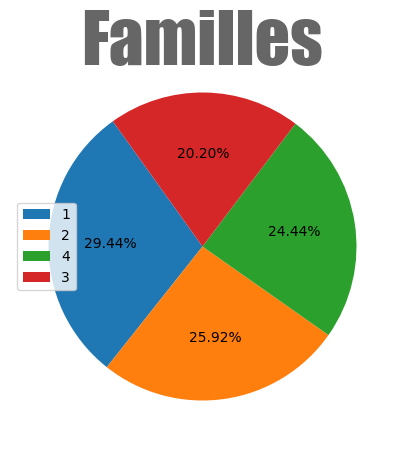

In [12]:
size =df.Family.value_counts().values/10 # Obtenir la taille en %
label=df.Family.value_counts().index # Les labels
plt.figure(figsize=(8,5)) # La taille de la figure
plt.title('Familles',fontname='Impact',fontsize=50,y=.95,alpha=0.6) # Le titre
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=label,loc='center left') #La légende
plt.show()

In [13]:
# Revenu : Le revenu du demandeur en $
df['Income'].value_counts()

Income
44     85
38     84
81     83
41     82
39     81
       ..
202     2
203     2
189     2
224     1
218     1
Name: count, Length: 162, dtype: int64

In [14]:
# Family : La taille de la famille du demandeur
df['Family'].value_counts()

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

In [15]:
# CCAvg : La moyenne des dépenses mensuelles du demandeur
df['CCAvg'].value_counts()

CCAvg
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
3.25      1
3.67      1
4.67      1
8.90      1
2.75      1
Name: count, Length: 108, dtype: int64

In [16]:
# Education : Le niveau d'études du demandeur
df['Education'].value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

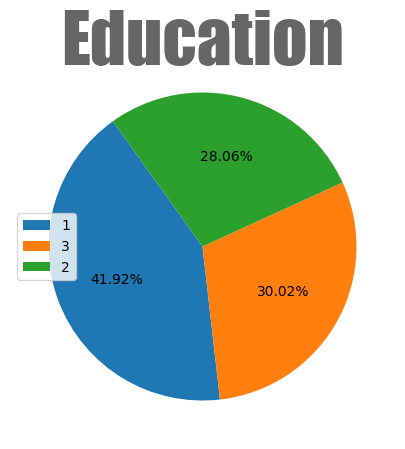

In [17]:
size =df.Education.value_counts().values/10 # Obtenir la taille
label=df.Education.value_counts().index
plt.figure(figsize=(8,5)) # La taille de la figure
plt.title('Education',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Titre
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=label,loc='center left') #La légende
plt.show()

In [18]:
# Mortgage
df['Mortgage'].value_counts()

Mortgage
0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: count, Length: 347, dtype: int64

#### Remarque : plusieurs clients n'ont pas d'hypothèque sur leur domicile.

In [19]:
# Personal Loan : La colonne target : obtention du crédit personnel
df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

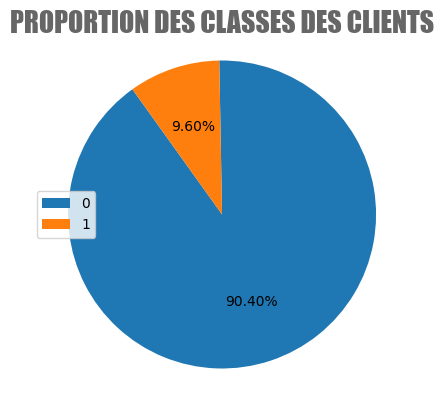

<Figure size 640x480 with 0 Axes>

In [20]:
size =df['Personal Loan'].value_counts().values/10 # Obtenir la taille
lbl=df['Personal Loan'].value_counts().index
plt.figure(figsize=(8,5)) # La taille de la figure
plt.title('PROPORTION DES CLASSES DES CLIENTS',fontname='Impact',fontsize=20,y=.95,alpha=0.6) #Titre
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #La légende
plt.show()
plt.savefig("figures/proportion_clients_avant_ech.png")

In [21]:
# Securities Account
df['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

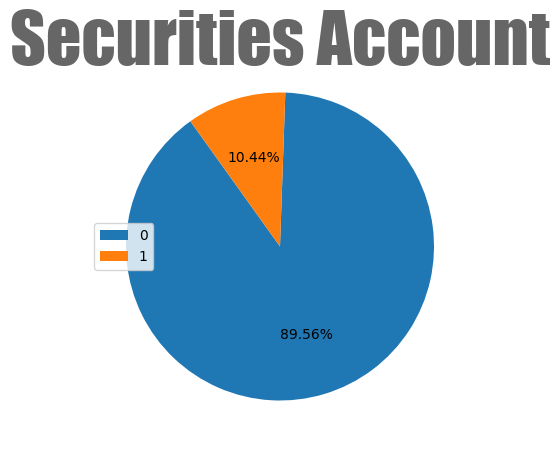

In [22]:
size =df['Securities Account'].value_counts().values/10 # Obtenir la taille
lbl=df['Securities Account'].value_counts().index
plt.figure(figsize=(8,5)) # La taille de la figure
plt.title('Securities Account',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Titre
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #La légende
plt.show()

In [23]:
# CD Account
df['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

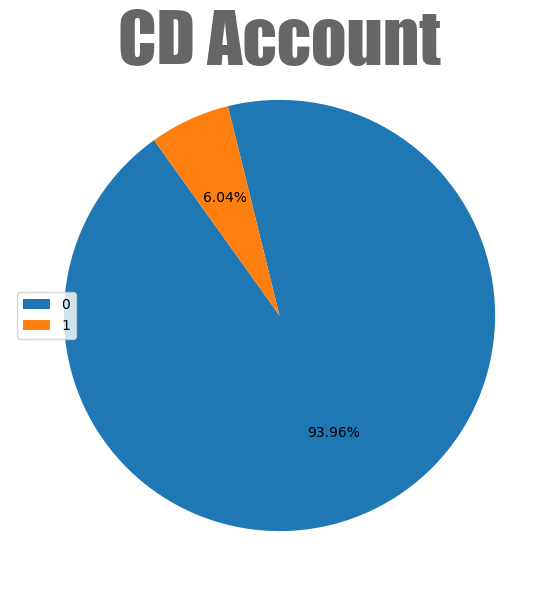

In [24]:
size =df['CD Account'].value_counts().values/10 # Obtenir la taille
lbl=df['CD Account'].value_counts().index
plt.figure(figsize=(8,7)) # La taille de la figure
plt.title('CD Account',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Titre
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #La légende
plt.show()

In [25]:
# Online
df['Online'].value_counts()

Online
1    2984
0    2016
Name: count, dtype: int64

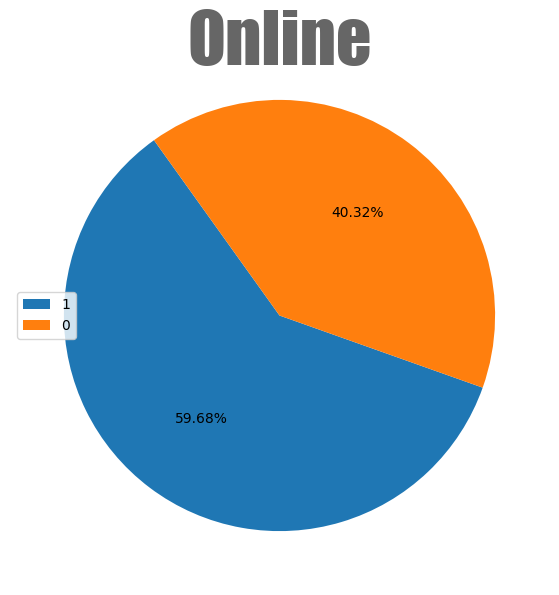

In [26]:
size =df.Online.value_counts().values/10 # Obtenir la taille
lbl=df.Online.value_counts().index
plt.figure(figsize=(8,7)) # La taille de la figure
plt.title('Online',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Titre
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #La légende
plt.show()

In [27]:
# CreditCard
df['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

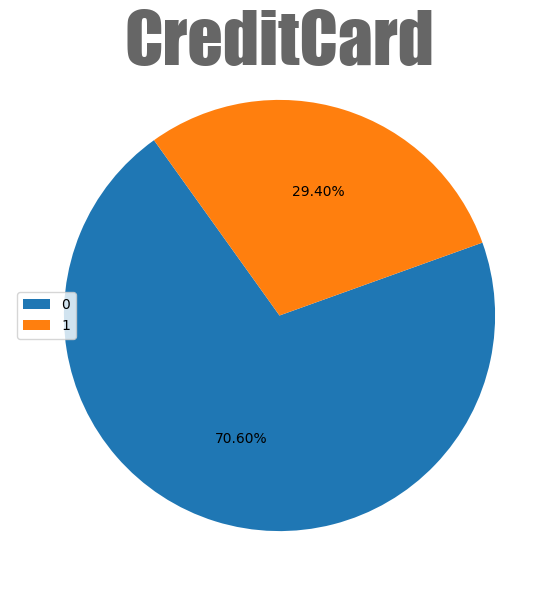

In [28]:
size =df.CreditCard.value_counts().values/10 # Obtenir la taille
lbl=df.CreditCard.value_counts().index
plt.figure(figsize=(8,7)) # La taille de la figure
plt.title('CreditCard',fontname='Impact',fontsize=50,y=.95,alpha=0.6) #Titre
plt.pie(size ,startangle=125.6,autopct='%1.2f%%') #Pieplot
plt.legend(labels=lbl,loc='center left') #La légende
plt.show()

In [29]:
# Experience : Les années d'expérience professionnelle du demandeur
df['Experience'].value_counts()

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: count, dtype: int64

#### Remarque : La colonne 'Experience' possède des données négatives.
     - Cette colonne ne peut avoir des données négatives.
     - Pour résoudre ce problème, nous allons les rendre positives par la fonction de la valeur absolue 'abs()'

In [30]:
# Nombre des valeurs négatives
df[df['Experience'] < 0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [31]:
# Application de la fonction 'abs()'
df['Experience']= abs(df['Experience'])

In [32]:
df.describe()

Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200  93152.503000     2.396400   
std      11.463166    11.415189    46.033729   2121.852197     1.147663   
min      23.000000     0.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937938     1.881000    56.498800       0.096000   
std       1.747659     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [33]:
# Les colonnes numériques et catégorielles du dataset
cat_colonnes=[col for col in df.columns if df[col].nunique()<=5]
print('Colonnes catégorielles :\n',cat_colonnes)
num_colonnes=[col for col in df.columns if df[col].nunique()>5]
print('Colonnes numériques :\n',num_colonnes)

Colonnes catégorielles :
 ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Colonnes numériques :
 ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [34]:
# Séparer le dataset en colonnes numériques et catégorielles
df_nums = df[num_colonnes]
df_objs = df[cat_colonnes]

### Visualisation des colonnes numériques

In [35]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5000 non-null   int64  
 1   Experience  5000 non-null   int64  
 2   Income      5000 non-null   int64  
 3   ZIP Code    5000 non-null   int64  
 4   CCAvg       5000 non-null   float64
 5   Mortgage    5000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


In [36]:
df_nums.describe().transpose()

count          mean          std     min      25%      50%  \
Age         5000.0     45.338400    11.463166    23.0     35.0     45.0   
Experience  5000.0     20.134600    11.415189     0.0     10.0     20.0   
Income      5000.0     73.774200    46.033729     8.0     39.0     64.0   
ZIP Code    5000.0  93152.503000  2121.852197  9307.0  91911.0  93437.0   
CCAvg       5000.0      1.937938     1.747659     0.0      0.7      1.5   
Mortgage    5000.0     56.498800   101.713802     0.0      0.0      0.0   

                75%      max  
Age            55.0     67.0  
Experience     30.0     43.0  
Income         98.0    224.0  
ZIP Code    94608.0  96651.0  
CCAvg           2.5     10.0  
Mortgage      101.0    635.0

### Visualisation des colonnes catégorielles

In [37]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Family              5000 non-null   int64
 1   Education           5000 non-null   int64
 2   Personal Loan       5000 non-null   int64
 3   Securities Account  5000 non-null   int64
 4   CD Account          5000 non-null   int64
 5   Online              5000 non-null   int64
 6   CreditCard          5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [38]:
df_objs.describe().transpose()

count    mean       std  min  25%  50%  75%  max
Family              5000.0  2.3964  1.147663  1.0  1.0  2.0  3.0  4.0
Education           5000.0  1.8810  0.839869  1.0  1.0  2.0  3.0  3.0
Personal Loan       5000.0  0.0960  0.294621  0.0  0.0  0.0  0.0  1.0
Securities Account  5000.0  0.1044  0.305809  0.0  0.0  0.0  0.0  1.0
CD Account          5000.0  0.0604  0.238250  0.0  0.0  0.0  0.0  1.0
Online              5000.0  0.5968  0.490589  0.0  0.0  1.0  1.0  1.0
CreditCard          5000.0  0.2940  0.455637  0.0  0.0  0.0  1.0  1.0

### Analyse des données catégorielles

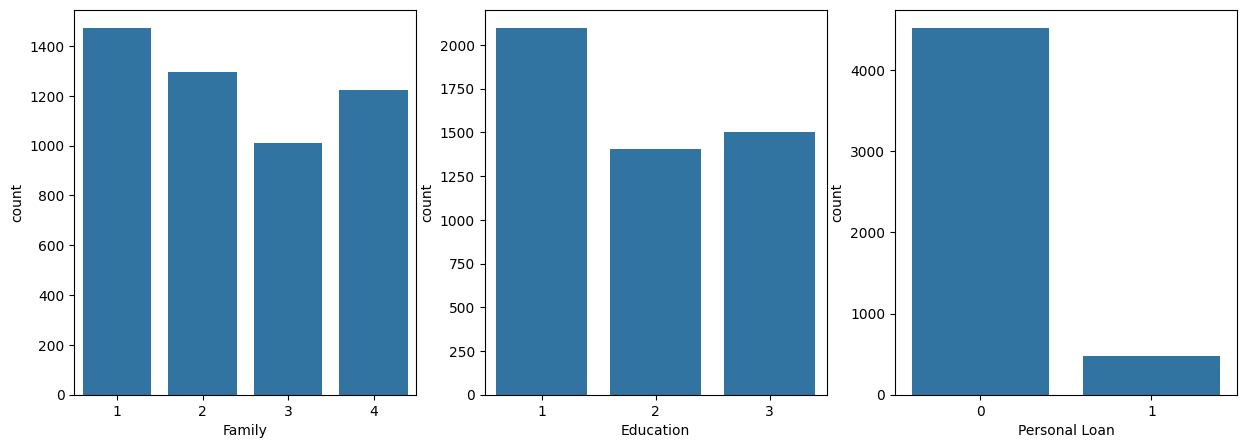

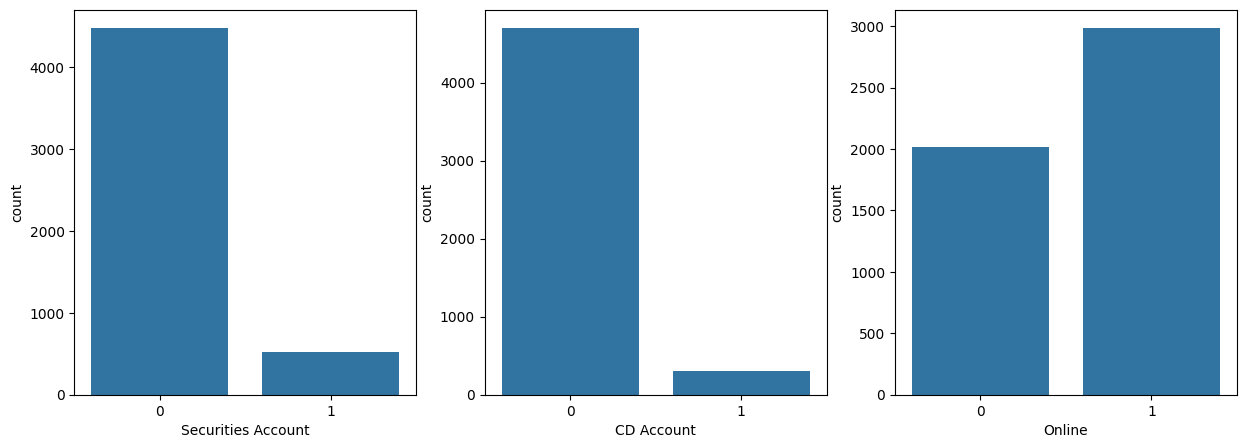

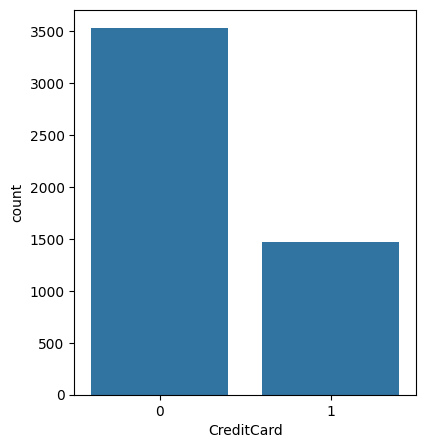

In [39]:
# Affichage des colonnes catégorielles sur un countplot
i=0
while i <df_objs.shape[1]:
    fig=plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.countplot(x=df_objs.columns[i], data=df_objs)
    i+=1
    if i==7:
        break
    plt.subplot(1,3,2)
    sns.countplot(x=df_objs.columns[i], data=df_objs)
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x=df_objs.columns[i], data=df_objs)
    i+=1
   
    plt.show()

#### Remarques : 
    - La plupart des clients n'ont pas de Securities Account, CD Account et CreditCard.
    - La plupart des clients utilise les services bancaires par Internet.
    - La plupart des clients ont un niveau d'études 1(Undergrade) et un membre de famille(1).

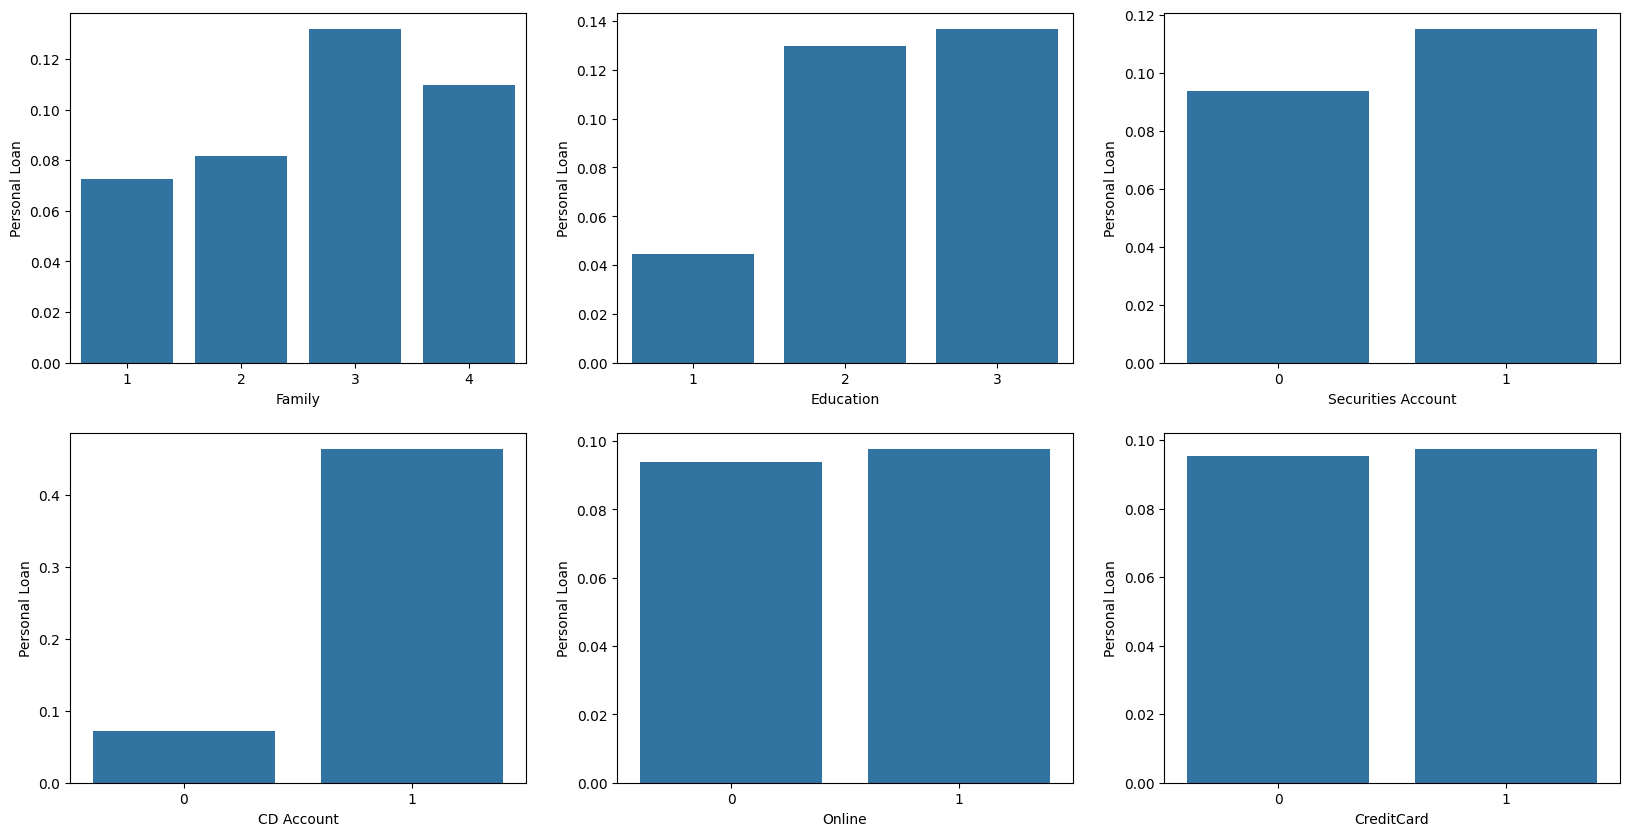

In [40]:
# Affichage des colonnes catégorielles et la colonne target sur un barplot
cat_colonnes=['Family','Education','Securities Account','CD Account', 'Online','CreditCard']
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(cat_colonnes):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal Loan',data=df_objs,ci=None)

#### Remarques : 
    - Les clients dont la taille de la famille est égale à 3 ont plus de chances d'obtenir un prêt personnel.
    - Les clients titulaires d'un diplôme de premier cycle ont moins de chances d'obtenir un prêt personnel que les autres clients titulaires d'un diplôme d'études supérieures ou avancé/professionnel.
    - Les clients disposant d'un compte CD et d'un compte titres ont plus de chances d'obtenir un prêt personnel.
    - Les clients utilisant ou non les services en ligne, ayant ou non une carte de crédit n'affectent pas beaucoup les chances d'obtenir un prêt personnel.

<Axes: xlabel='Education', ylabel='Income'>

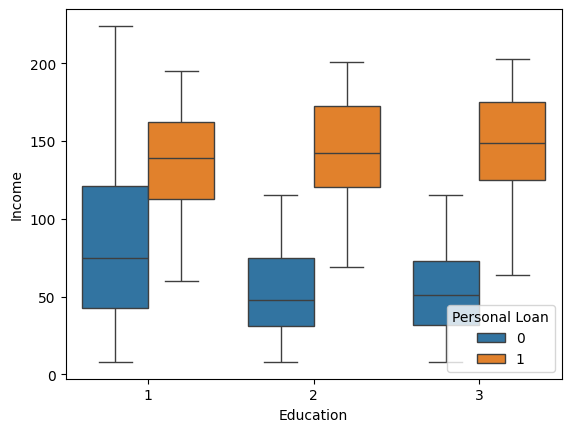

In [41]:
# Visualisation de l'influence du revenu et du niveau d'études sur le colonne target
sns.boxplot(x='Education',y= 'Income' ,hue= 'Personal Loan', data=df)

#### Remarques : 
    - Les client ayant niveau d'étude à 3 ont un revenu plus élévé.
    - Les clients ayant obtenu un crédit ont presque un meme revenu.
    - Les clients ayant un niveau d'étude 2 ou plus (Graduate ou Advanced/Professional) ont plus de chance d'obtenir un crédit.

<Axes: xlabel='Education', ylabel='Mortgage'>

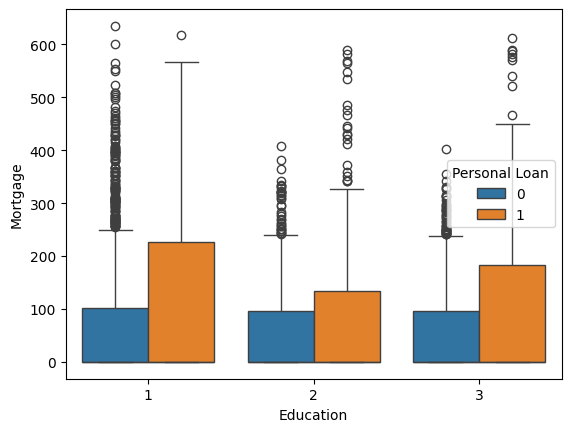

In [42]:
# Visualisation de l'influence du revenu et du mortgate sur  'Personal Loan'.
sns.boxplot(x='Education',y= 'Mortgage' ,hue= 'Personal Loan', data=df)

### Remarques : 
    - les clients dont le niveau d'éducation est 1 et qui n'ont pas contracté de prêt ont un prêt hypothécaire plus élevé que les clients qui contractent un prêt du même niveau d'éducation.
    - Les clients dont le niveau d'éducation est 2 et 3 et qui n'ont pas contracté de prêt ont un prêt hypothécaire inférieur à celui des clients qui contractent un prêt du même niveau d'éducation.

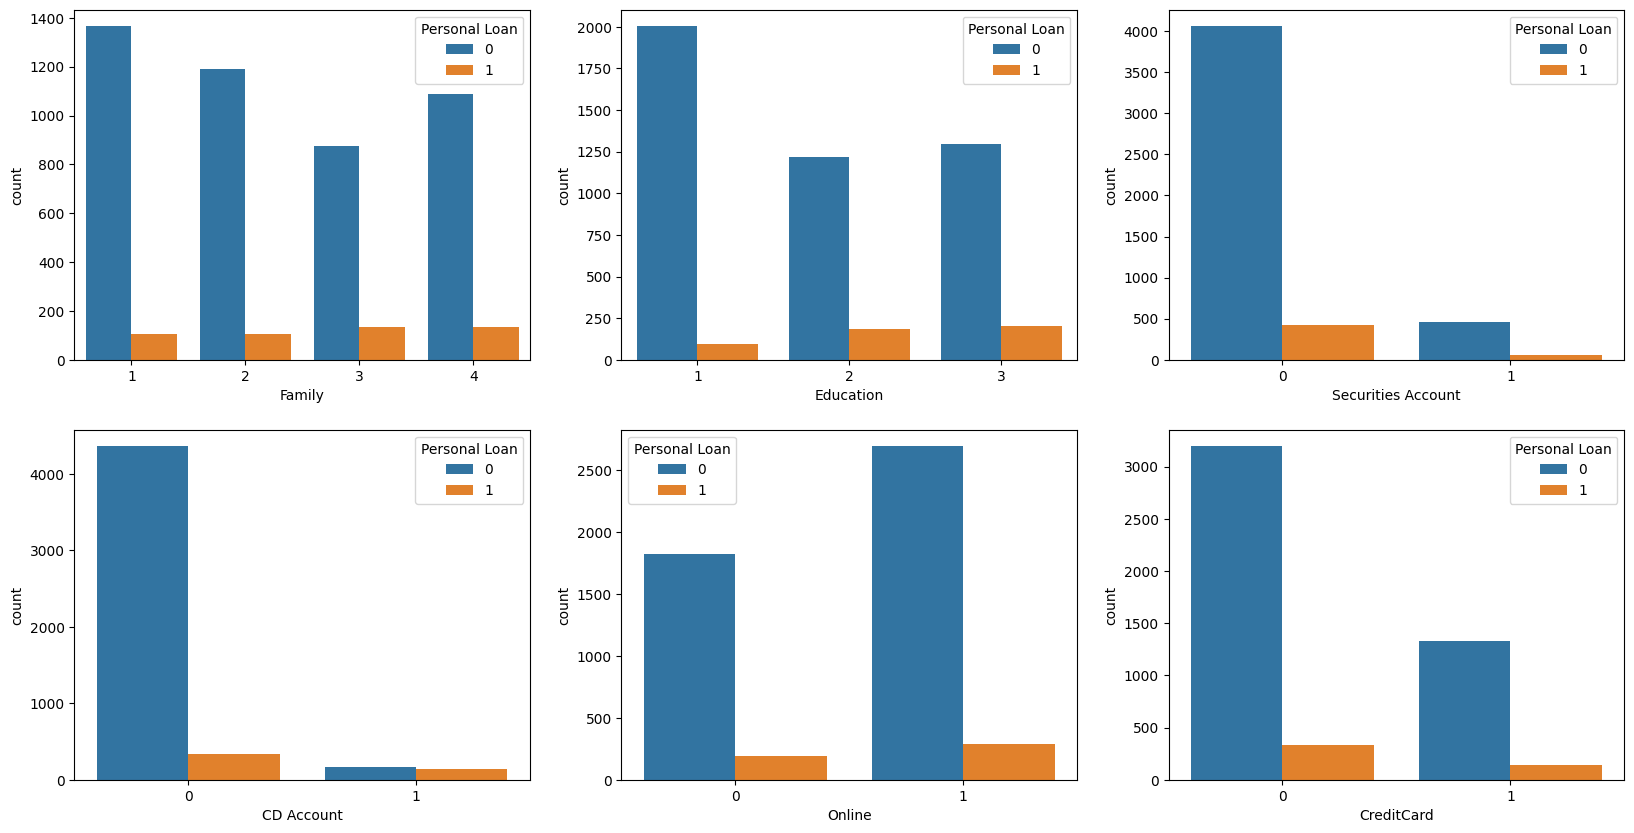

In [43]:
# Visualisation des colonnes catégorielles et la colonne target sur un countplot
cat_colonnes=['Family','Education','Securities Account','CD Account', 'Online','CreditCard']
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(cat_colonnes):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(x=col,hue='Personal Loan',data=df_objs)

#### Remarques : 
    - La plupart des clients n'ayant pas de carte de crédit, n'ont pas de pret.
    - La plupart des clients n'ayant pas une attestation de dépot, n'ont pas de pret.

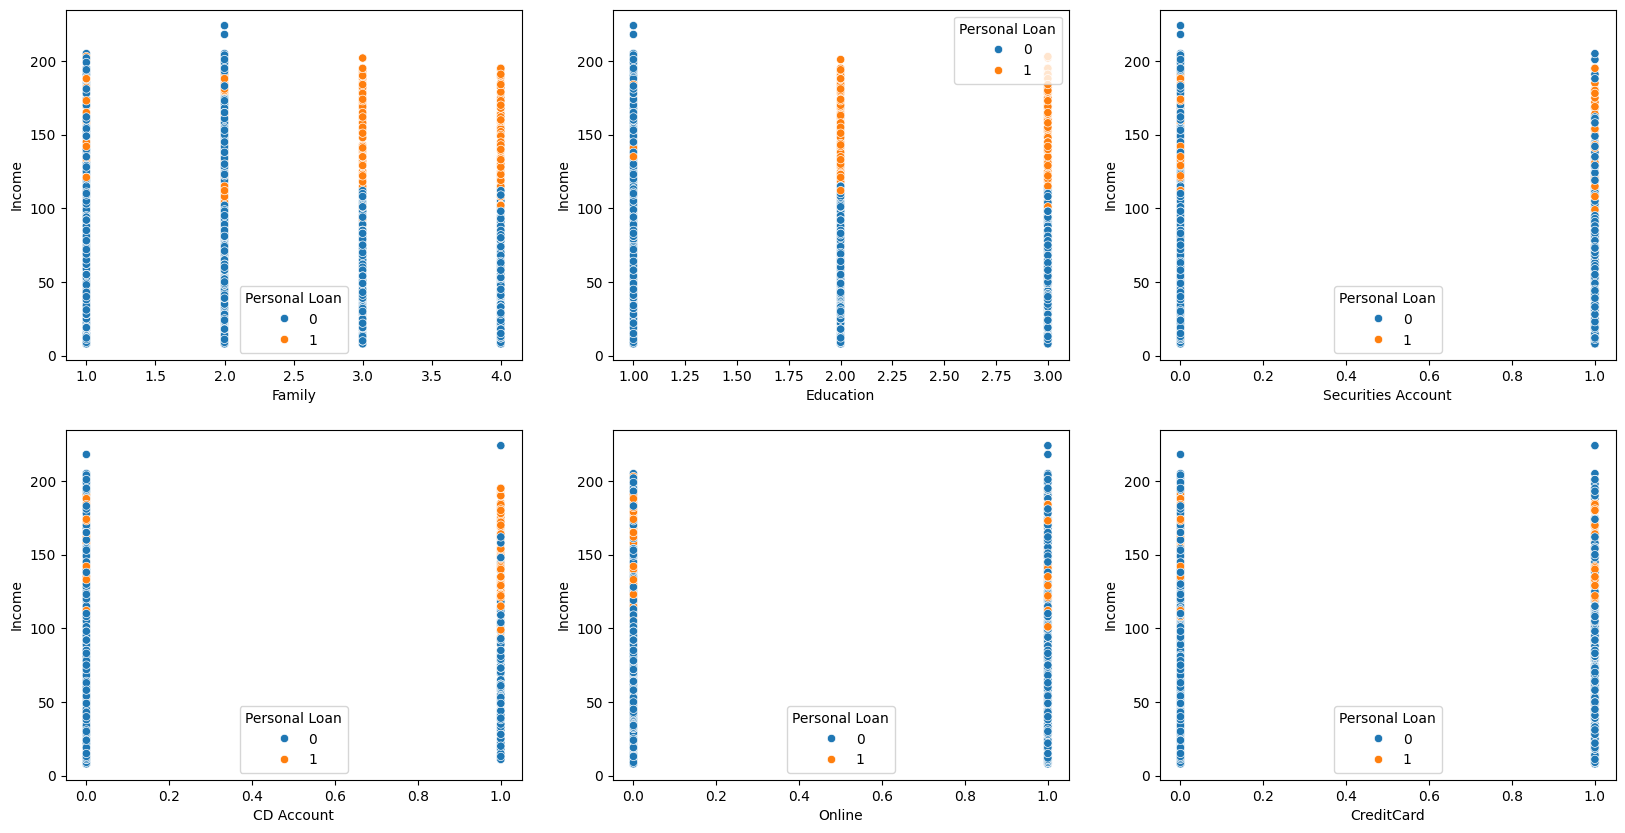

In [44]:
# Visualisation de l'influence du revevu sur les colonnes catégorielles sur un 'scatterplot'
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(cat_colonnes):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x=col,y='Income',hue='Personal Loan',data=df)

#### Remarques: 
    - Les clients ayant un degré d'étude élevé.
        et une fammille de 3 membres ou plus avec un revenu élevé obtiennent un pret.
    - Les clients ayant un CD account obtiennent un pret également.

### Analyse des données numériques

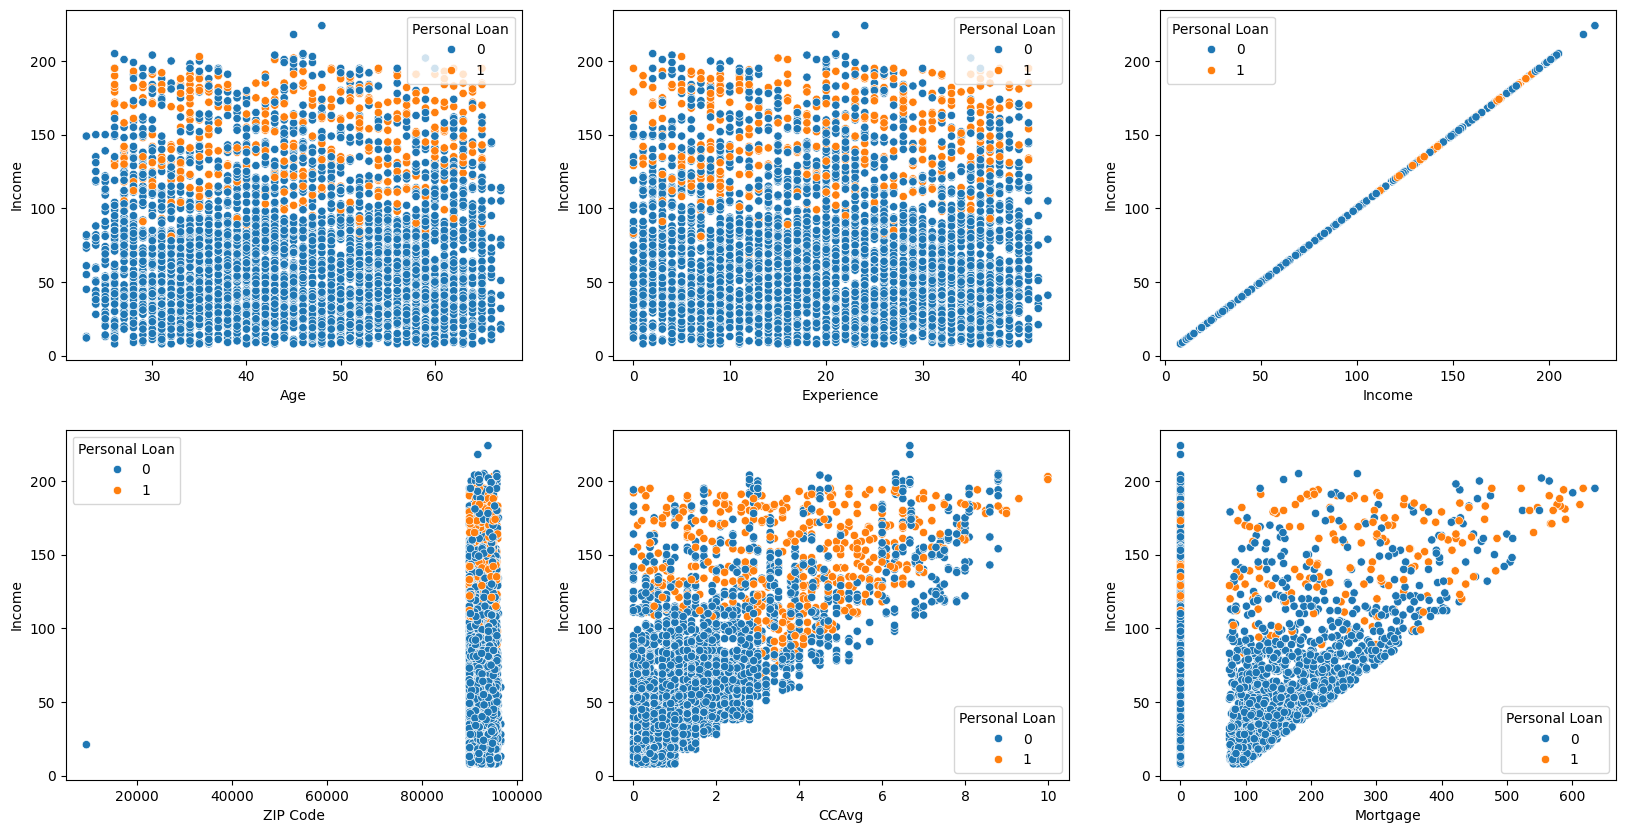

In [45]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(df_nums.columns):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x=col,y='Income',hue='Personal Loan',data=df)

#### Remarque : La colonne 'ZIP Code' contient un outlier(noise).

In [46]:
# Affichage de l'outlier du 'ZIP Code'
outlier=df[df['ZIP Code']<20000]
outlier

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    0.6          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

In [47]:
# Suppression de l'outlier
df.drop(index=384 , inplace=True)
df.reset_index(drop=True, inplace=True)

Text(0, 0.5, 'Personal Loan')

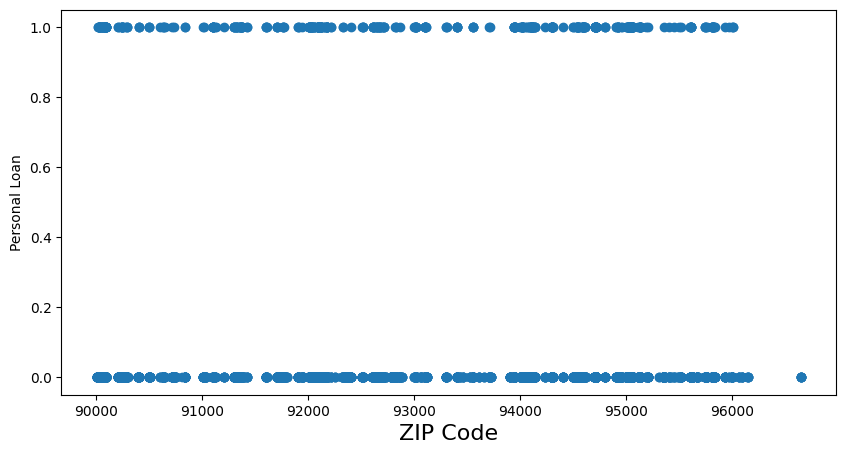

In [48]:
# Visualisation de la colonne après suppression de l'outlier
plt.figure(figsize=(10,5))
plt.scatter(df['ZIP Code'], df['Personal Loan'])
plt.xlabel( 'ZIP Code', fontsize=16)
plt.ylabel( 'Personal Loan', fontsize=10)

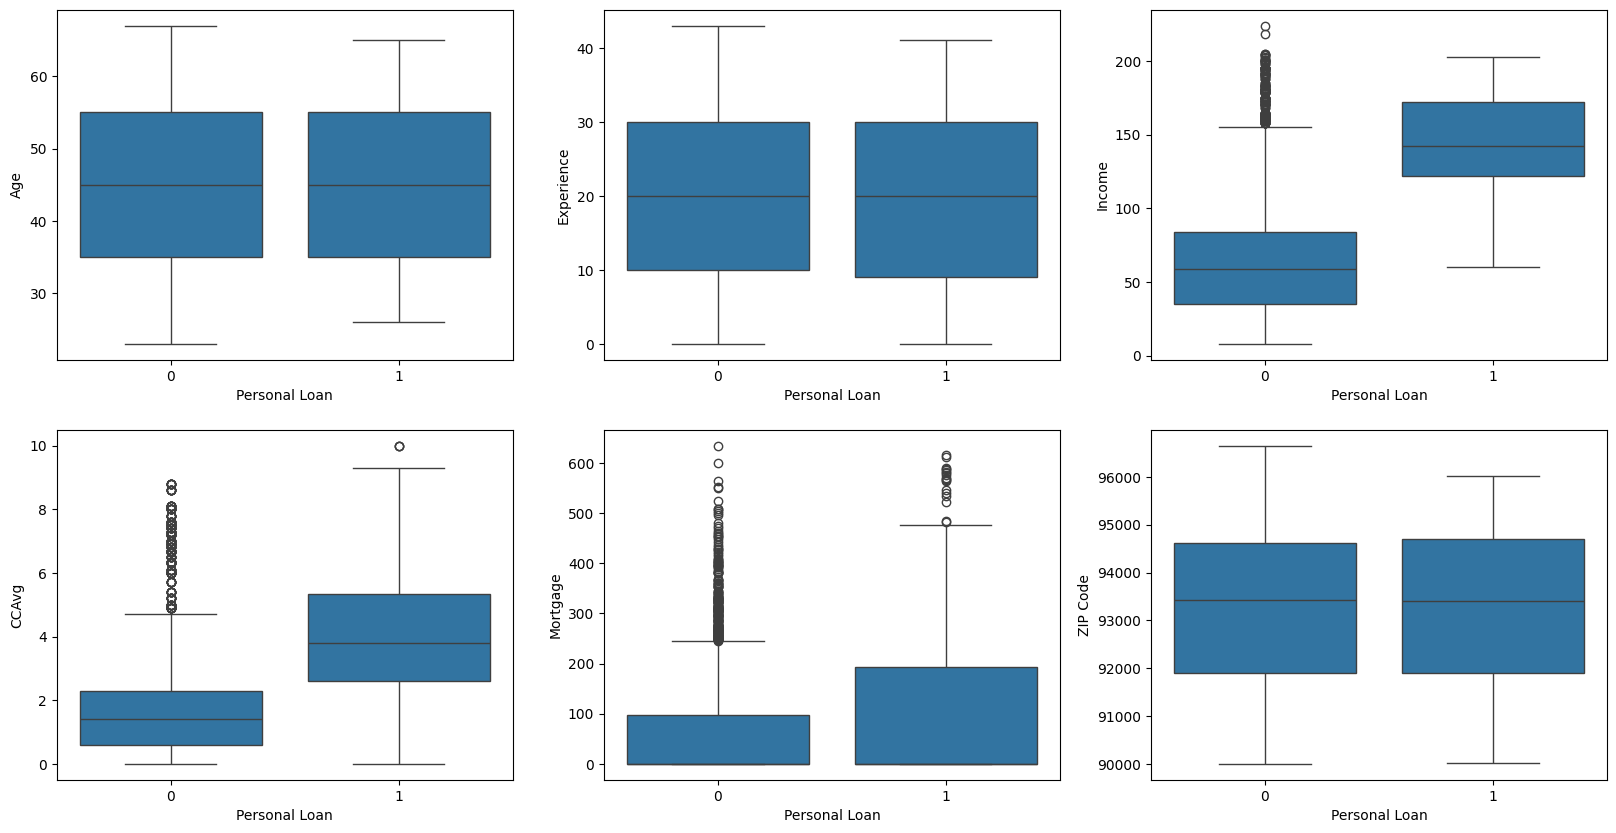

In [49]:
# Analyse du nombre des données numeriques sur un boxplot
nume_cols=['Age','Experience','Income','CCAvg','Mortgage','ZIP Code']
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=df[col],x=df['Personal Loan'])

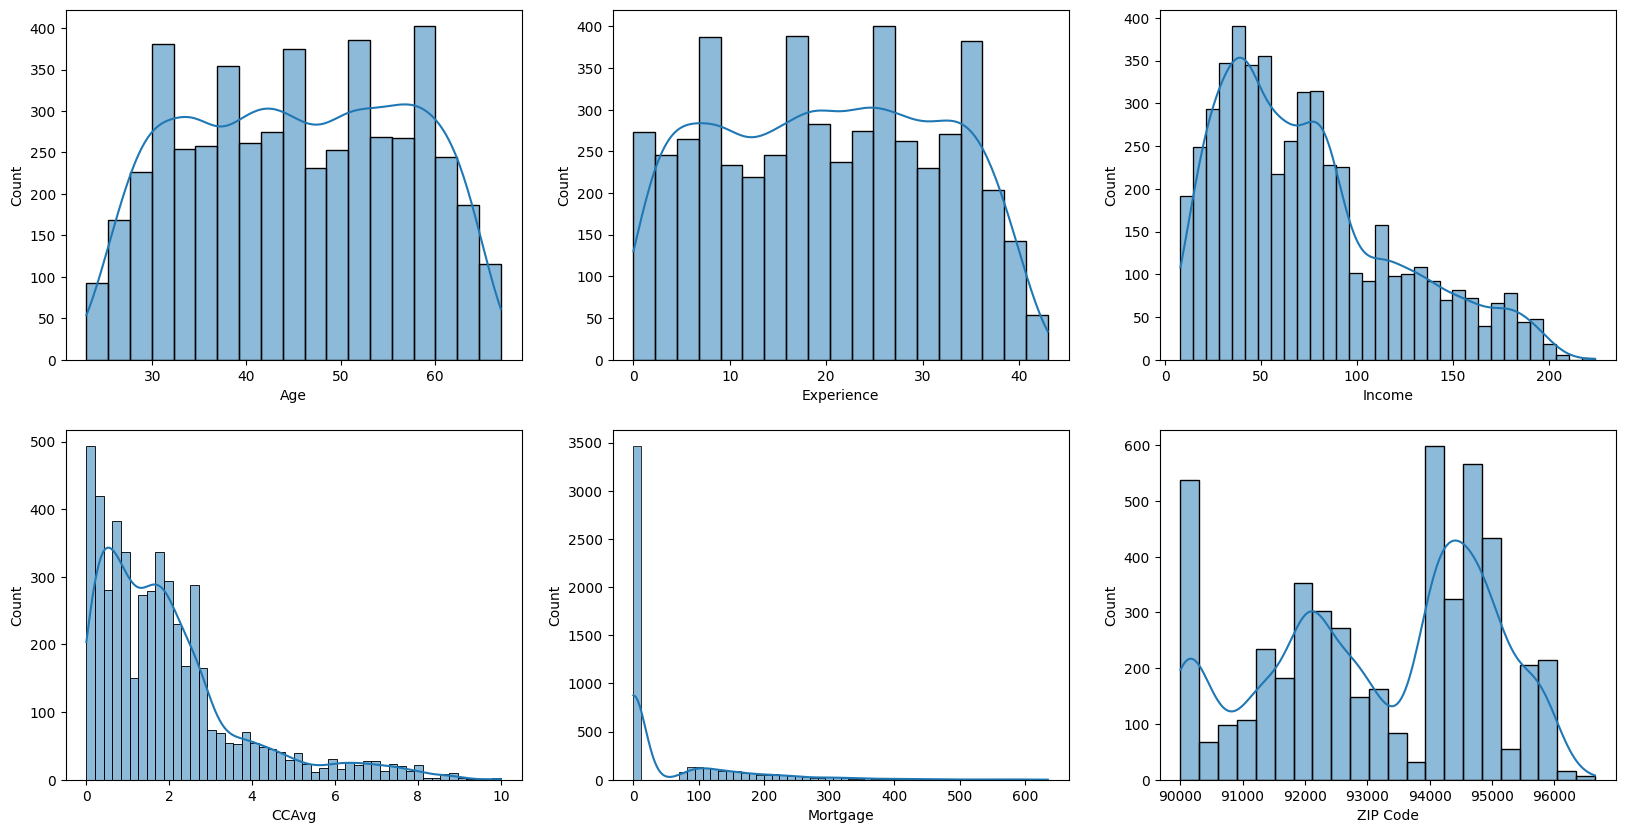

In [50]:
# Analyse des distributions des données numeriques
fig=plt.figure(figsize=(20,10))

for i,col in enumerate(nume_cols):

    ax=fig.add_subplot(2,3,i+1)
    sns.histplot(df[col],  kde=True)

#### Remarques : 
    - L'âge et l'expérience ont des distributions normales. Le revenu et le CCAvg sont des distributions asymétriques à droite.
    - Je ne vois aucune relation entre le code postal et d'autres variables.

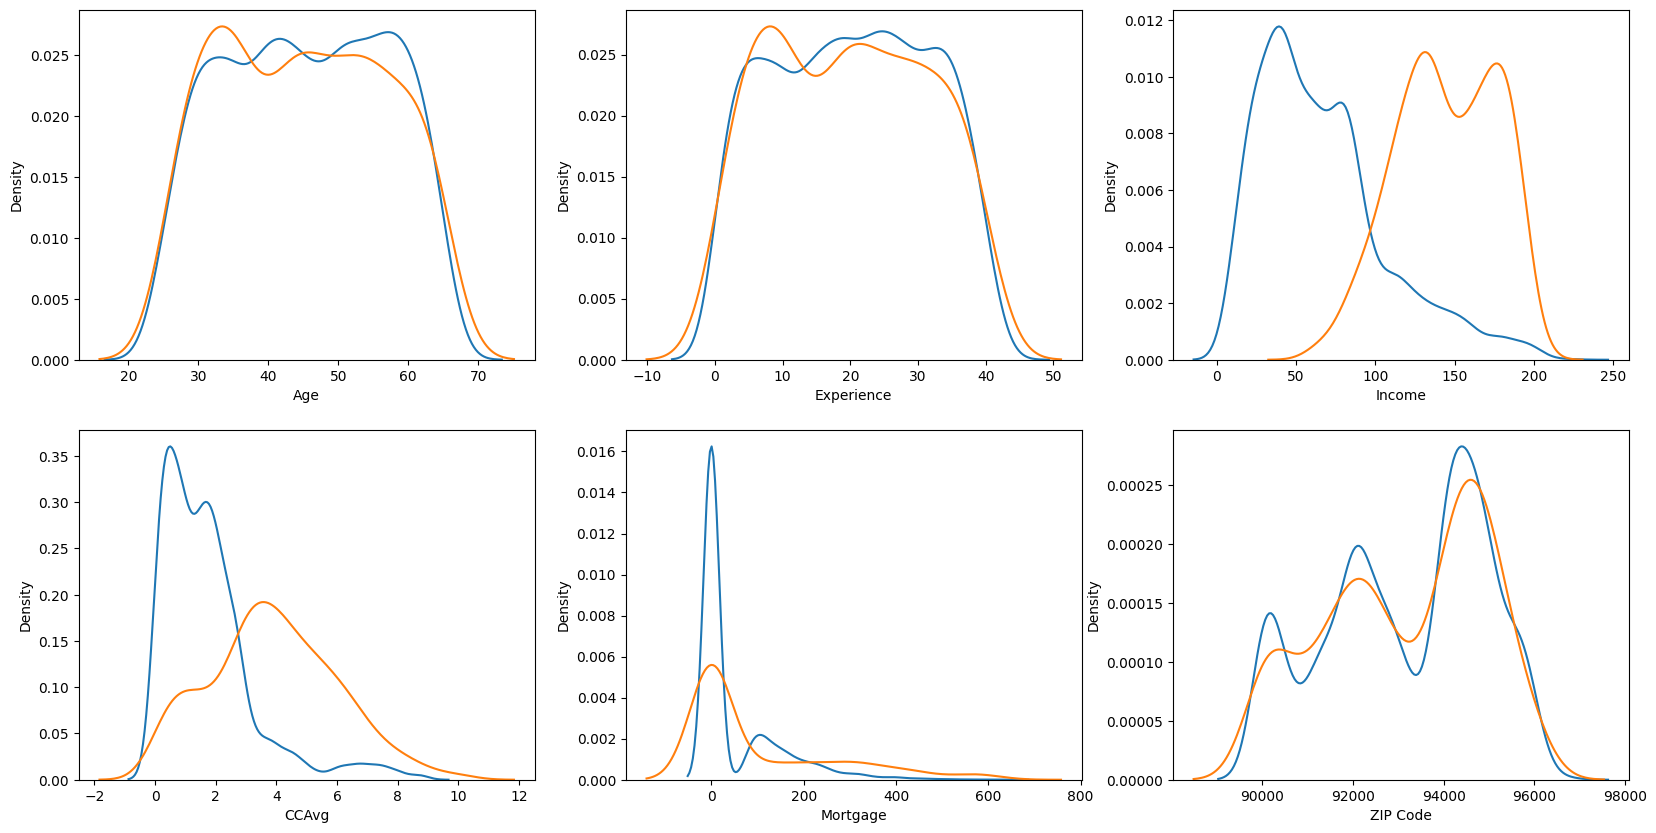

In [51]:
#Analyse des variations des données numeriques
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(nume_cols):
    ax=fig.add_subplot(2,3,i+1)
    ax1=sns.distplot(df[col][df['Personal Loan']==0],hist=False, kde=True, label='No Personal Lone' )
    sns.distplot(df[col][df['Personal Loan']==1],hist=False, kde=True , ax=ax1,label='Personal Lone')

#### Remarques : 
    - Le prêt personnel ne montre pas de variations selon l'âge et l'expérience.
    - Le revenu a un effet positif sur les prêts personnels. Les clients à revenu élevé ont plus de chances d'obtenir un prêt personnel.
    - CCAvg montre également une bonne relation avec les clients de prêts personnels dont le prêt personnel a une moyenne élevée des dépenses mensuelles en cartes de crédit.
    - Les clients souhaitent avoir un prêt hypothécaire élevé et ont opté pour un prêt personnel.

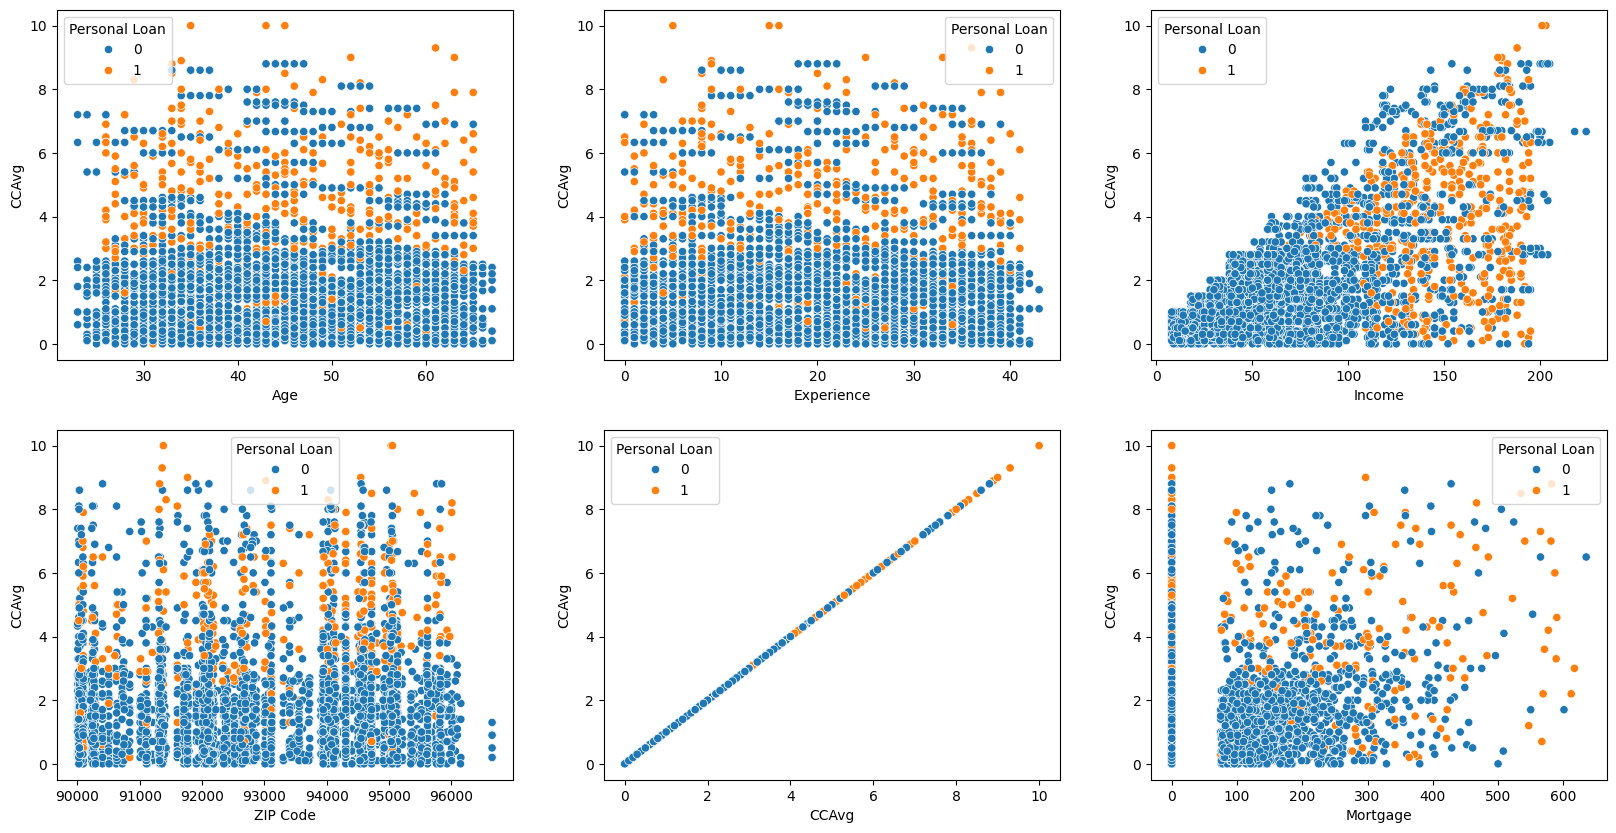

In [52]:
# Visualisation de la relation 'CCAvg' avec les autres colonnes
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(df_nums.columns):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x=col,y='CCAvg',hue='Personal Loan',data=df)

#### Remarques : 
    - L'âge et l'expérience n'ont pas beaucoup d'effet, car les clients à revenus élevés, quel que soit le groupe d'âge, ont des chances d'obtenir un prêt personnel.
    - Le code postal montre que tous les clients appartiennent à une zone particulière et qu'ils n'ont aucune probabilité d'obtenir un prêt personnel.
    - Les clients à revenus élevés et bénéficiant d'un prêt personnel affichent une moyenne élevée des dépenses mensuelles en cartes de crédit et de valeur élevée de l'hypothèque immobilière.

In [53]:
# Regrouper les ages des clients en intervalles
df ['Age_bin']= pd.cut(df['Age'], bins=[0,30,40,50,60,100], labels=['0-30', '31-40', '41-50', '51-60' ,'61-67'])

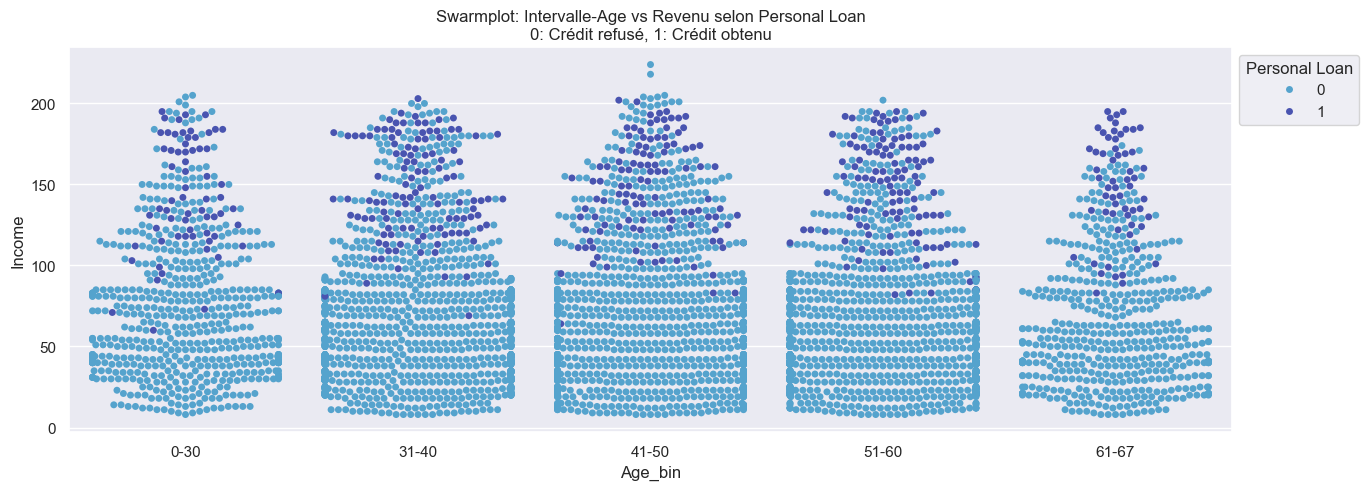

In [54]:
# Visualisation avec un swarmplot des clients par tranche d'age et revenu séparé par le 'Personal Loan'. 

sns.set(palette='icefire')
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='Age_bin', y='Income', hue='Personal Loan').set(title='Swarmplot: Intervalle-Age vs Revenu selon Personal Loan\n0: Crédit refusé, 1: Crédit obtenu');
plt.legend(loc="upper left" ,title="Personal Loan", bbox_to_anchor=(1,1))

# Remarques : 
    - Les clients dont la tranche d'age est de 41-50 sont les plus nombreux avec les prêts personnels.
    - Et la plupart de ces clients ont un revenu supérieur ou égal à 100. 

In [55]:
df ['mort_bin']= pd.cut(df['Mortgage'], bins=[0,200,400,600,800], labels=['0-200', '200-400', '400-600', '600-800' ])

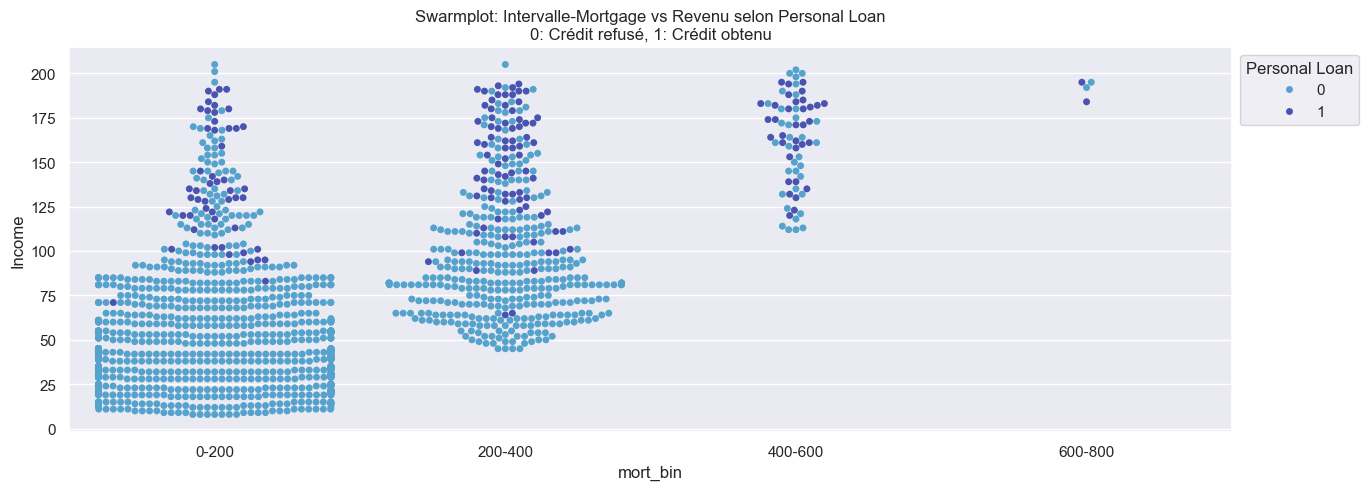

In [56]:
# Visualisation avec un swarmplot des clients par tranche d'age et revenu séparé par le 'Personal Loan'. 

sns.set(palette='icefire')
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='mort_bin', y='Income', hue='Personal Loan').set(title='Swarmplot: Intervalle-Mortgage vs Revenu selon Personal Loan\n0: Crédit refusé, 1: Crédit obtenu');
plt.legend(loc="upper left" ,title="Personal Loan", bbox_to_anchor=(1,1))

#### Les clients ayant un 'Mortgage' de 200 ou plus sont ceux plus éligibles à obtenir un prêt.

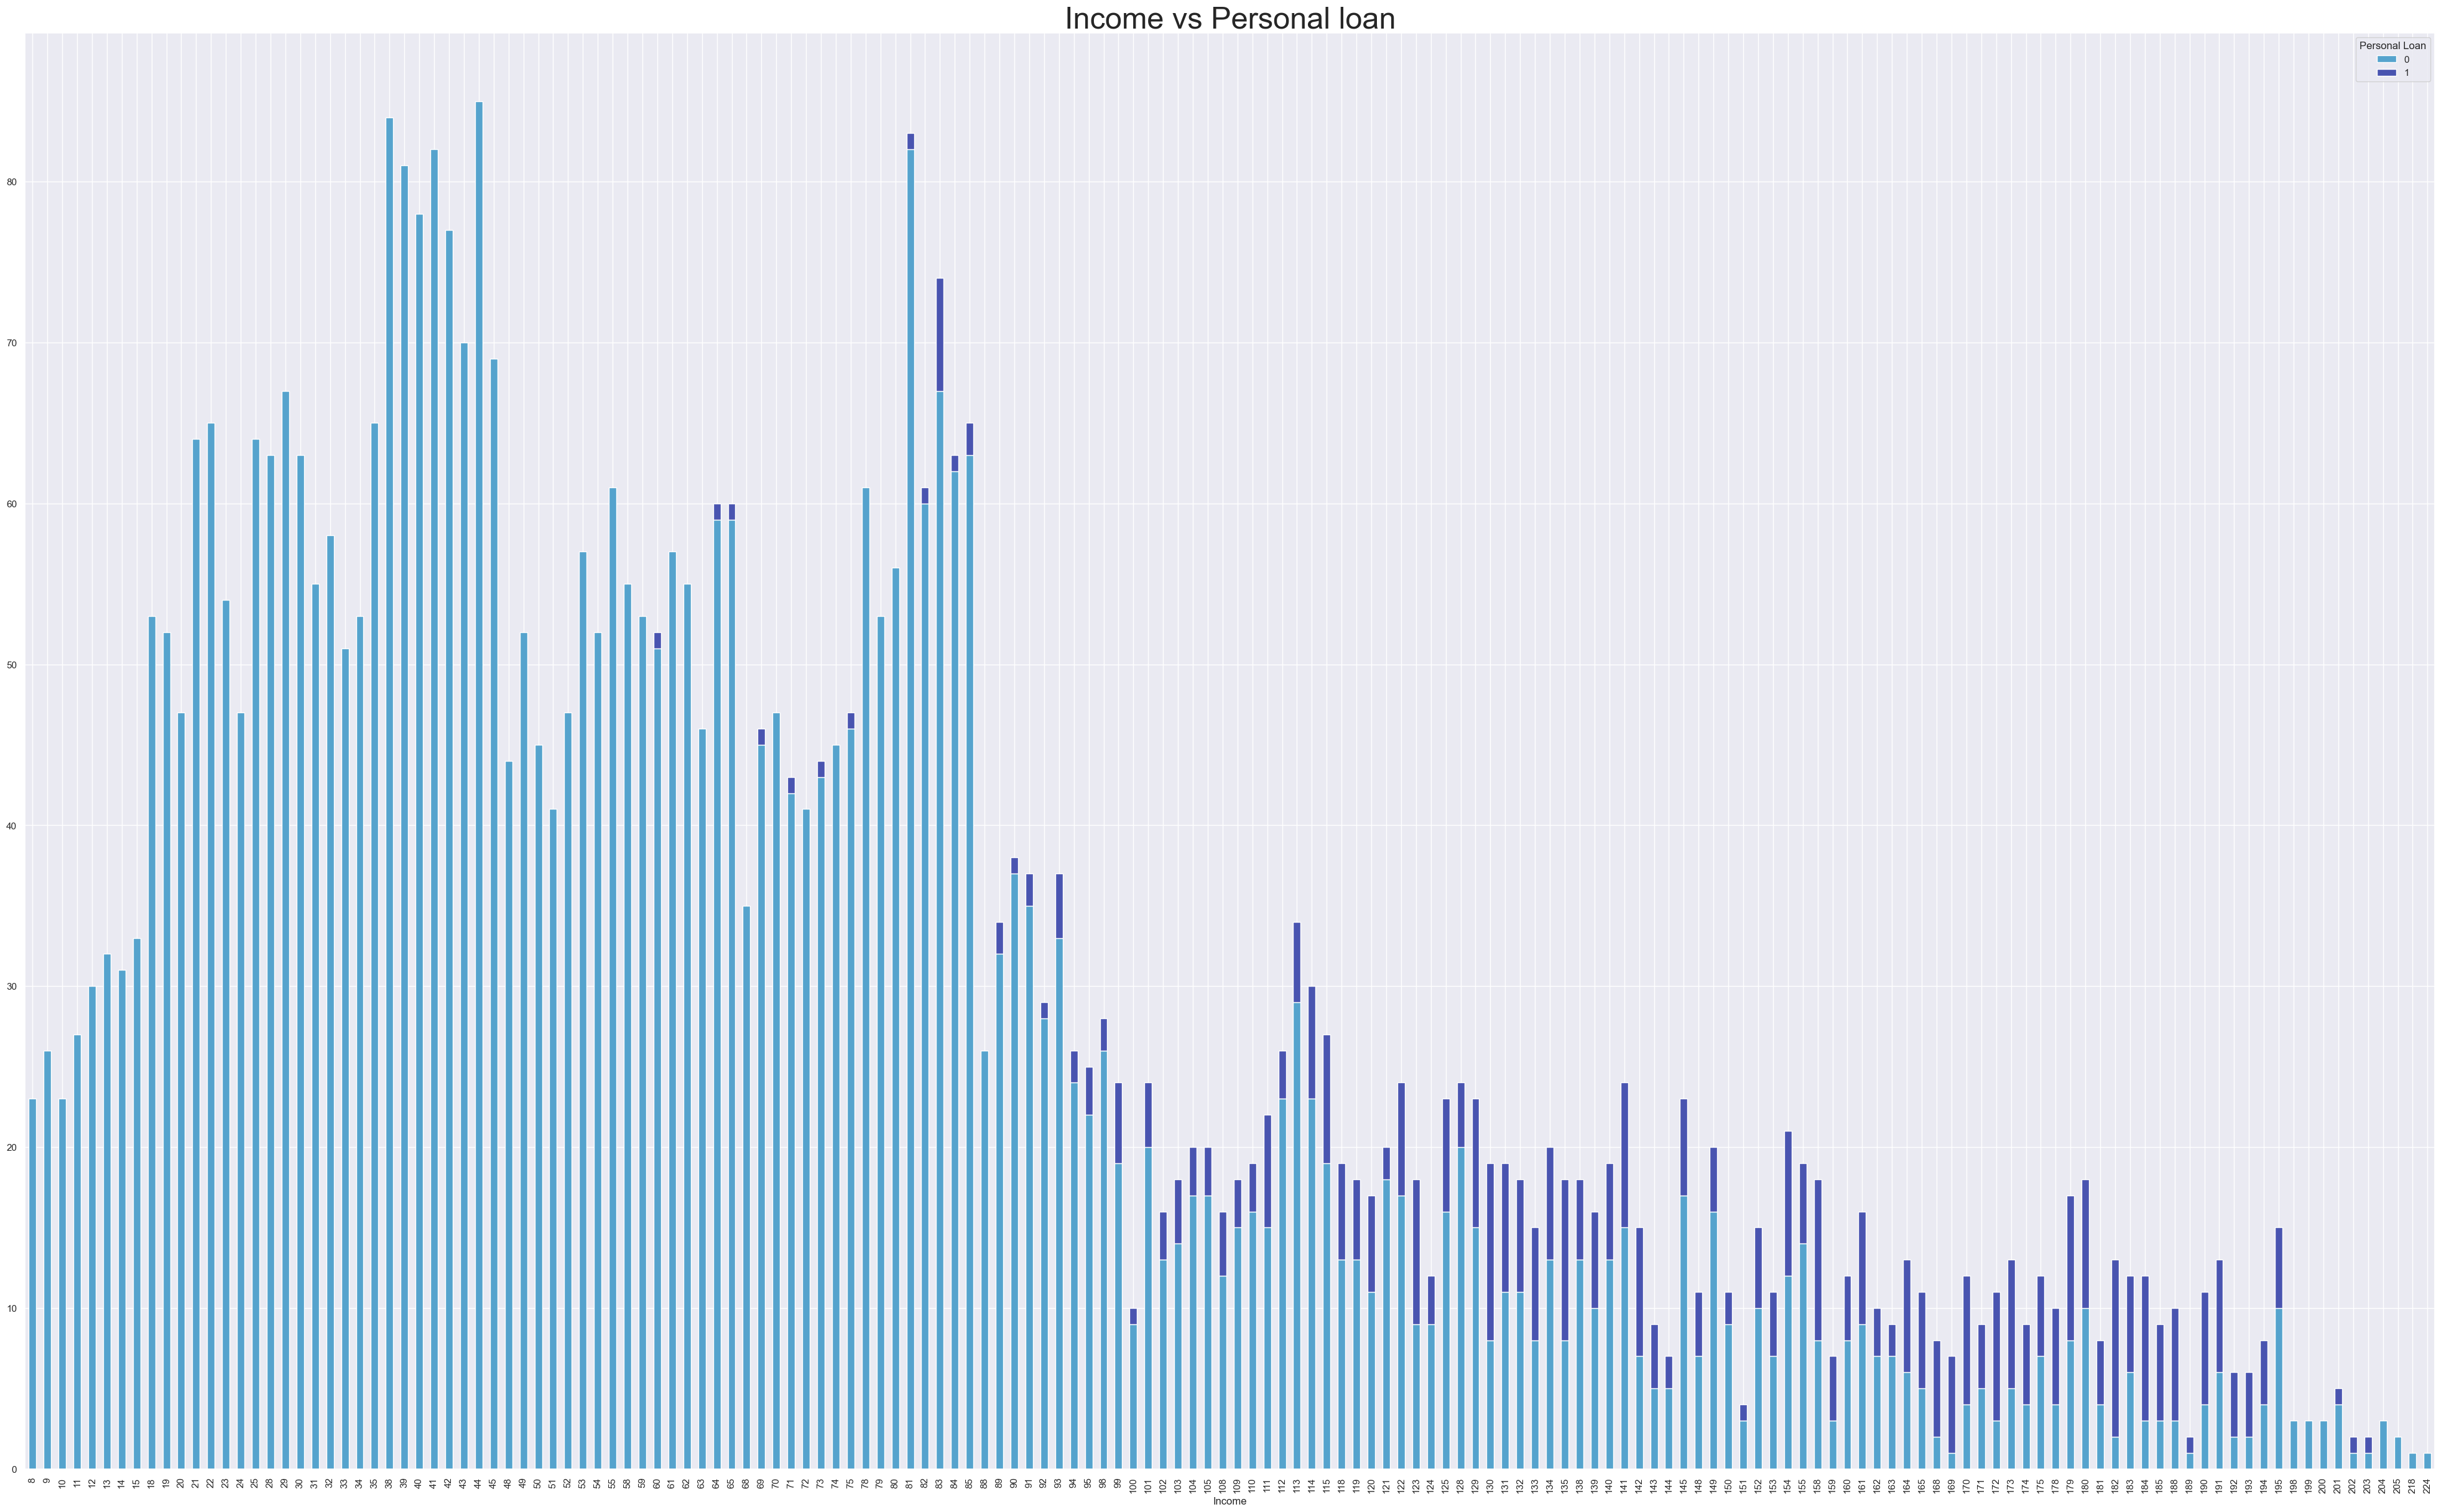

In [57]:
# Visualisation de l'influence du revenu sur 'Personal Loan'.
df.groupby(['Income', 'Personal Loan']).size().unstack().plot(kind='bar', stacked=True, figsize=(50, 30))
plt.title('Income vs Personal loan', fontsize=35)

plt.show()

#### Renarque : Les clients ayant le plus grand revenu sont ceux plus éligibles à obtenir un prêt.

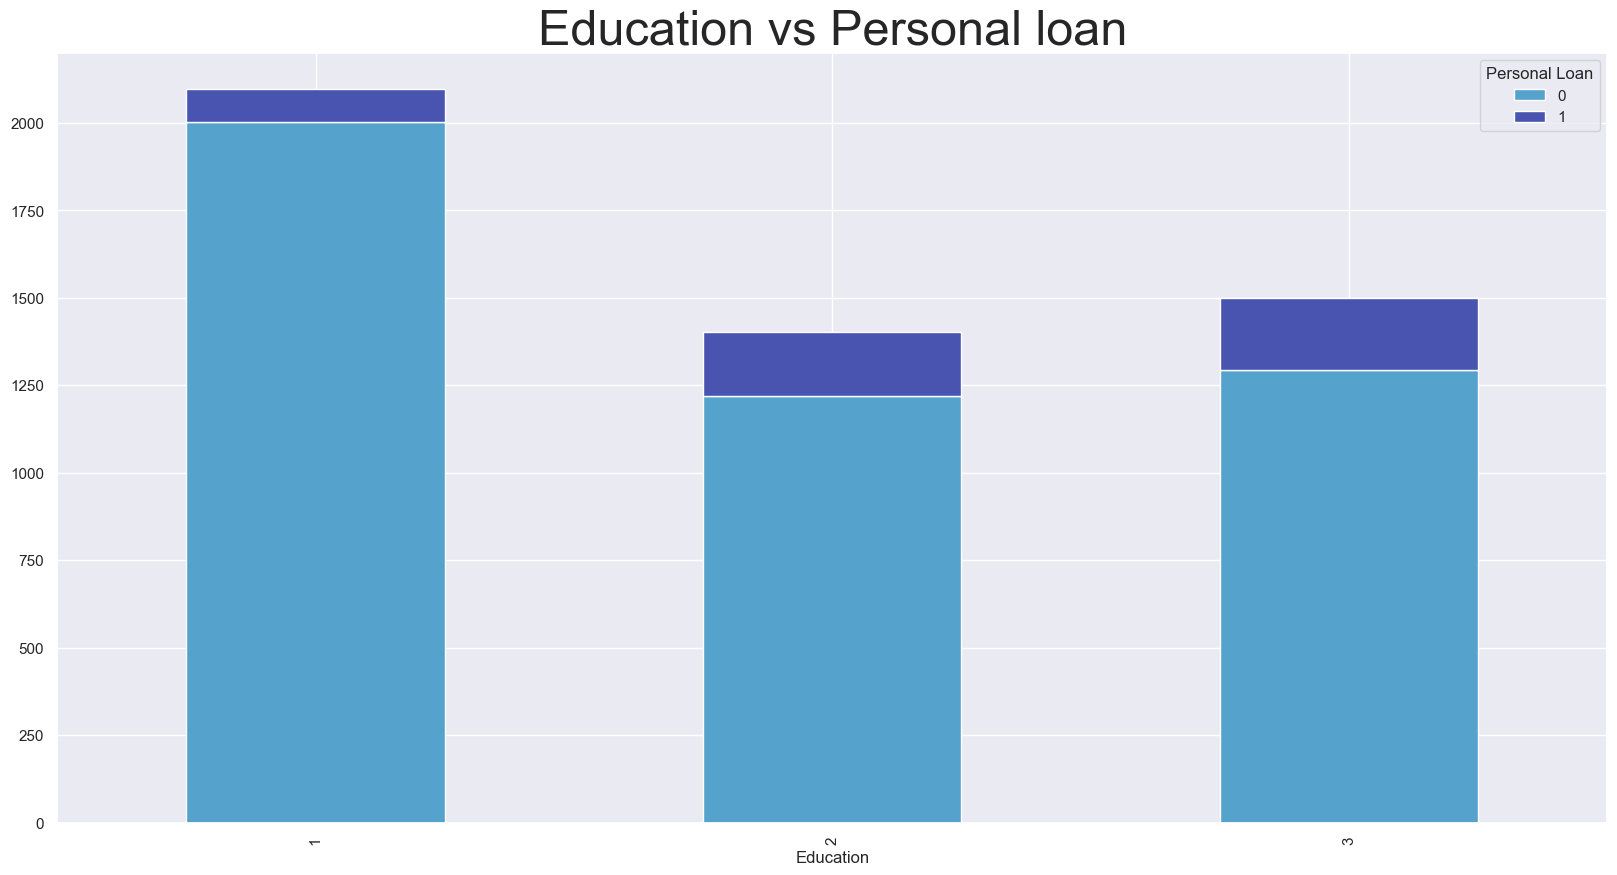

In [58]:
# Visualisation de l'influence du niveau d'étude sur 'Personal Loan'.
df.groupby(['Education', 'Personal Loan']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Education vs Personal loan', fontsize=35)

plt.show()

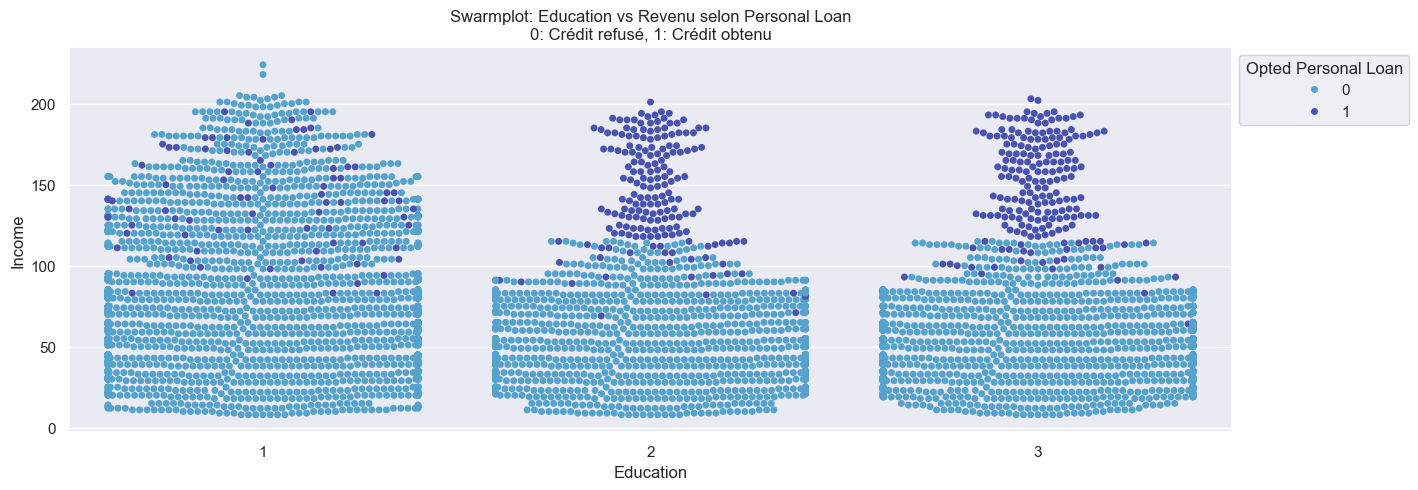

In [59]:
# Visualisation avec un swarmplot des clients par niveau d'étude(Education) et revenu(Income) séparé par le 'Personal Loan'.

sns.set(palette='icefire')
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='Education', y='Income', hue='Personal Loan').set(title='Swarmplot: Education vs Revenu selon Personal Loan\n0: Crédit refusé, 1: Crédit obtenu');
plt.legend(loc="upper left" ,title="Opted Personal Loan", bbox_to_anchor=(1,1));

#### Remarque : les clients ayant un niveau d'étude(Education) élevé sont plus éligibles à obtenir un prêt.

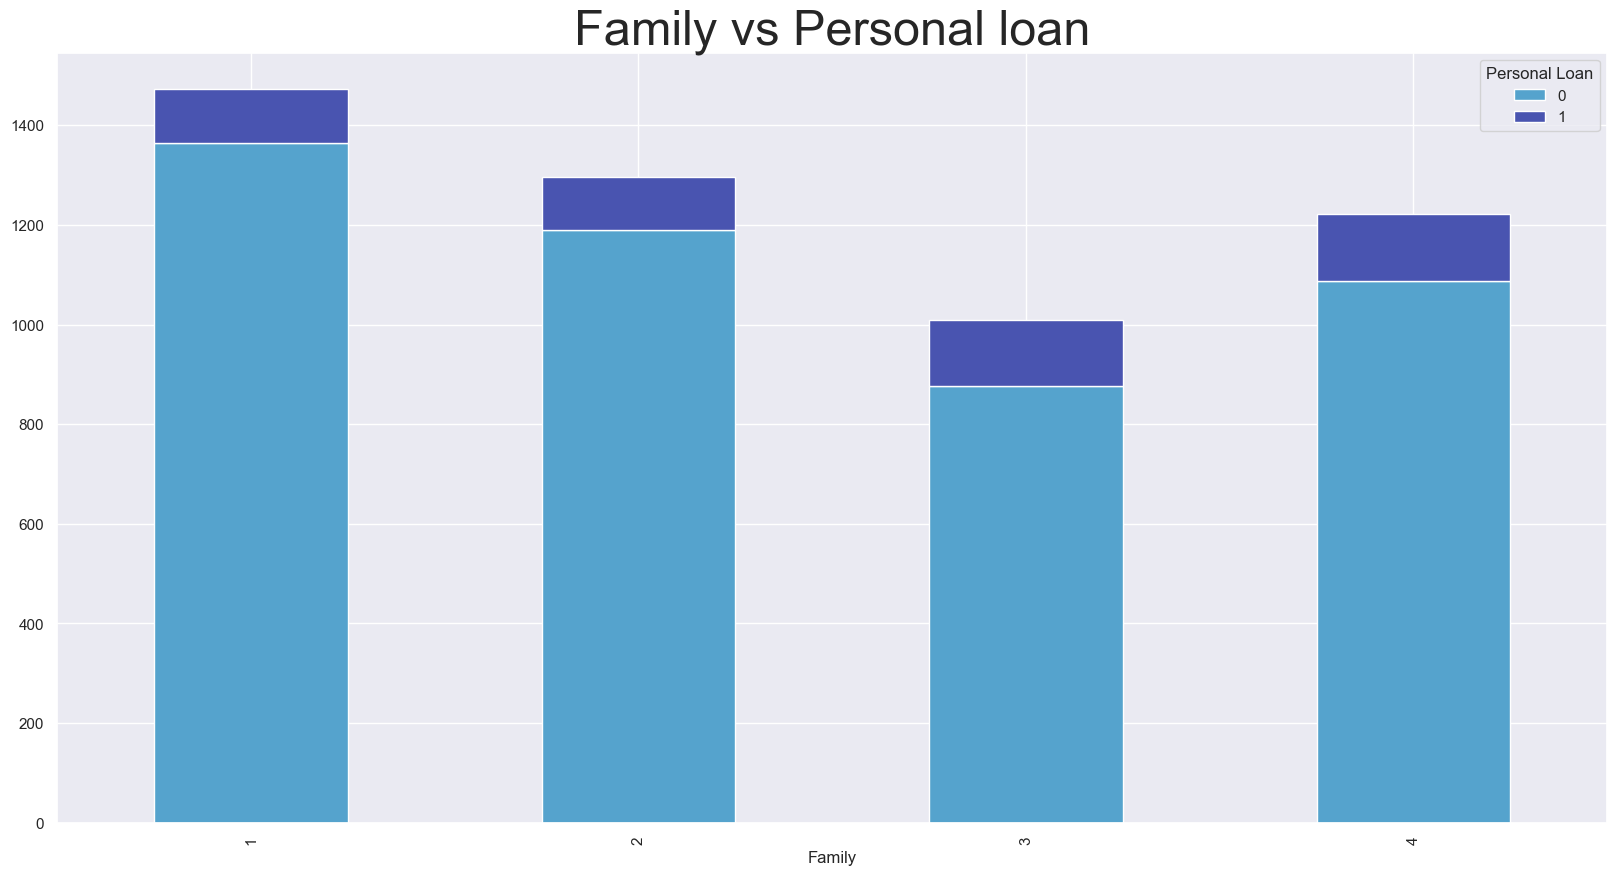

In [60]:
# Visualisation de l'influence 'Family' sur 'Personal loan'.
df.groupby(['Family', 'Personal Loan']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Family vs Personal loan', fontsize=35)

plt.show()

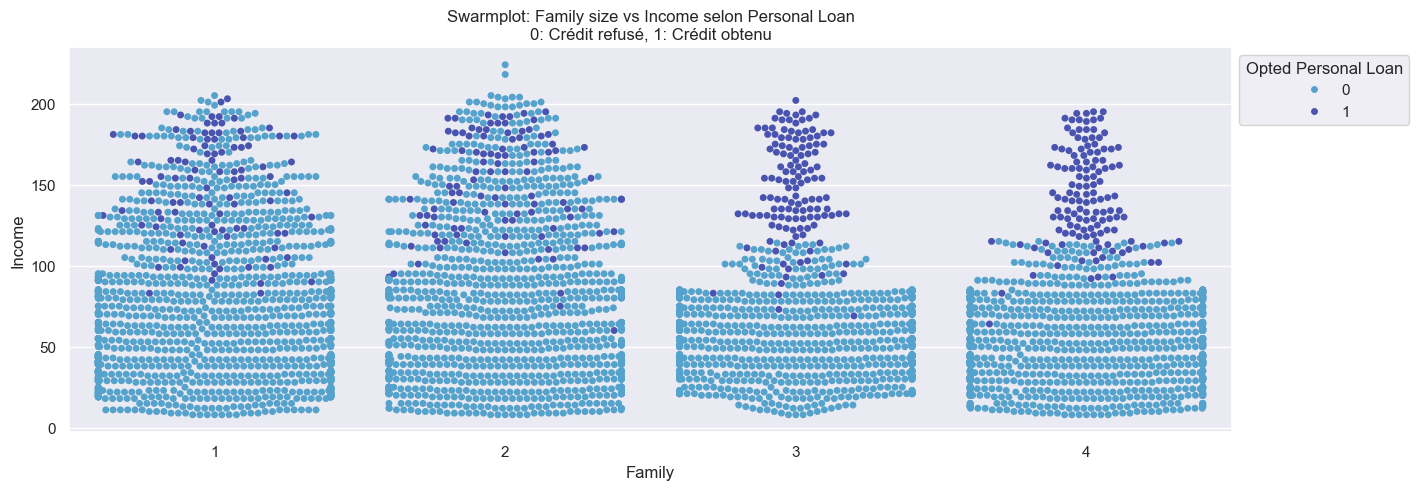

In [61]:
# Visualisation avec un swarmplot des clients par 'Family size' et revenu(Income) séparé par le 'Personal Loan'.
sns.set(palette='icefire')
plt.figure(figsize=(15,5))
sns.swarmplot(data=df, x='Family', y='Income', hue='Personal Loan').set(title='Swarmplot: Family size vs Income selon Personal Loan\n0: Crédit refusé, 1: Crédit obtenu');
plt.legend(loc="upper left" ,title="Opted Personal Loan", bbox_to_anchor=(1,1));

#### Remarque : les familles avec une taille de 3 ou plus et un revenu > 100 sont plus éligibles à obtenir un pret.

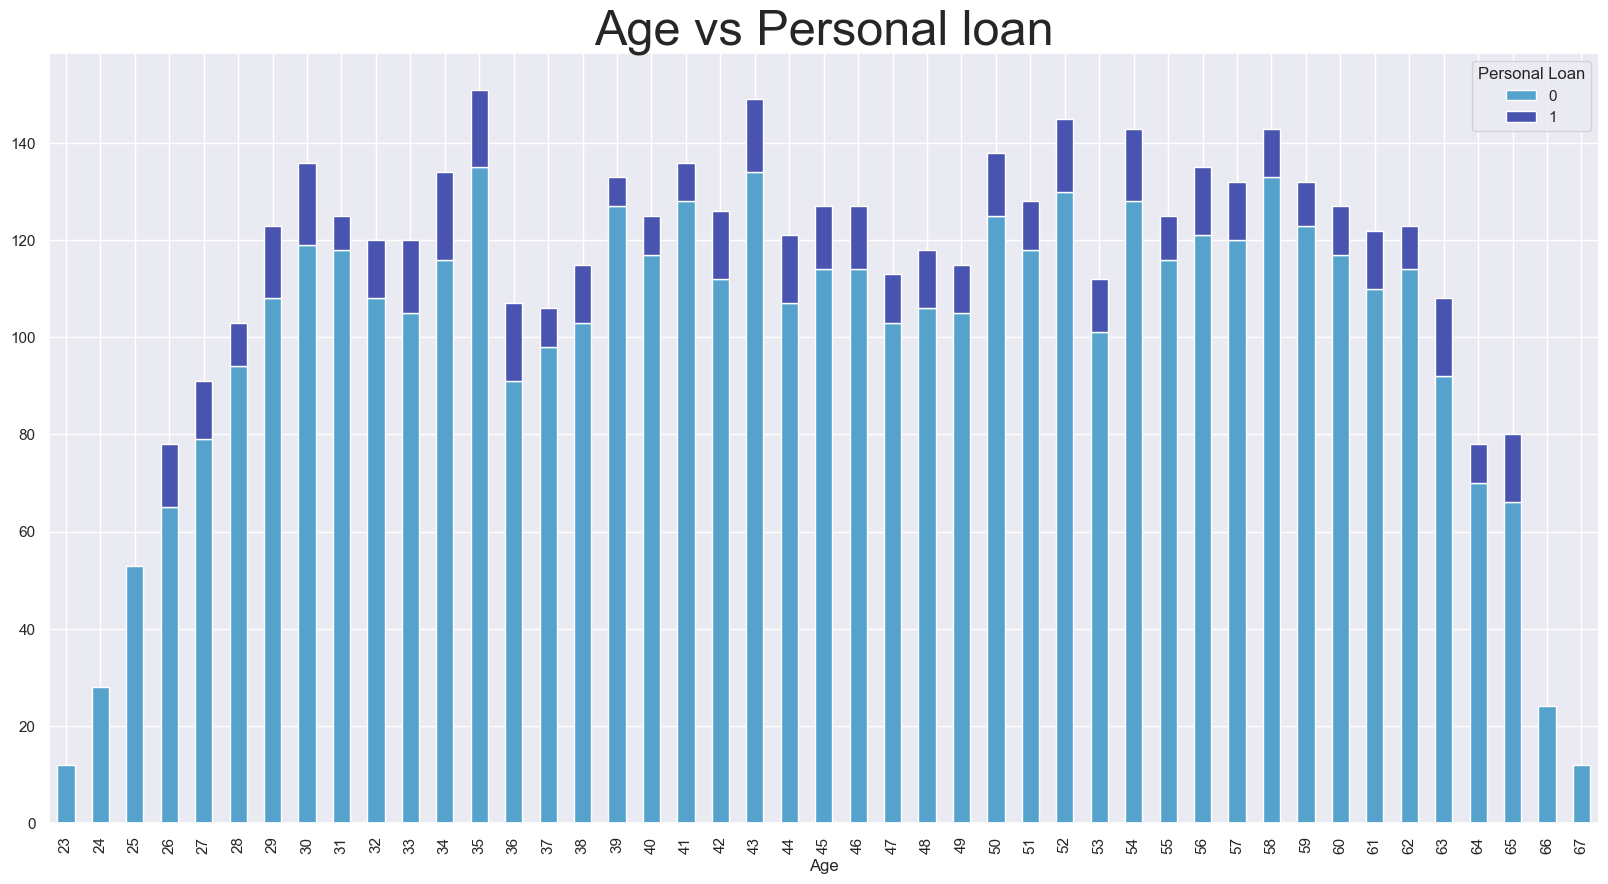

In [62]:
# Visualisation de l'influence de 'Age' sur 'Personal Loan'.
df.groupby(['Age', 'Personal Loan']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Age vs Personal loan', fontsize=35)

plt.show()

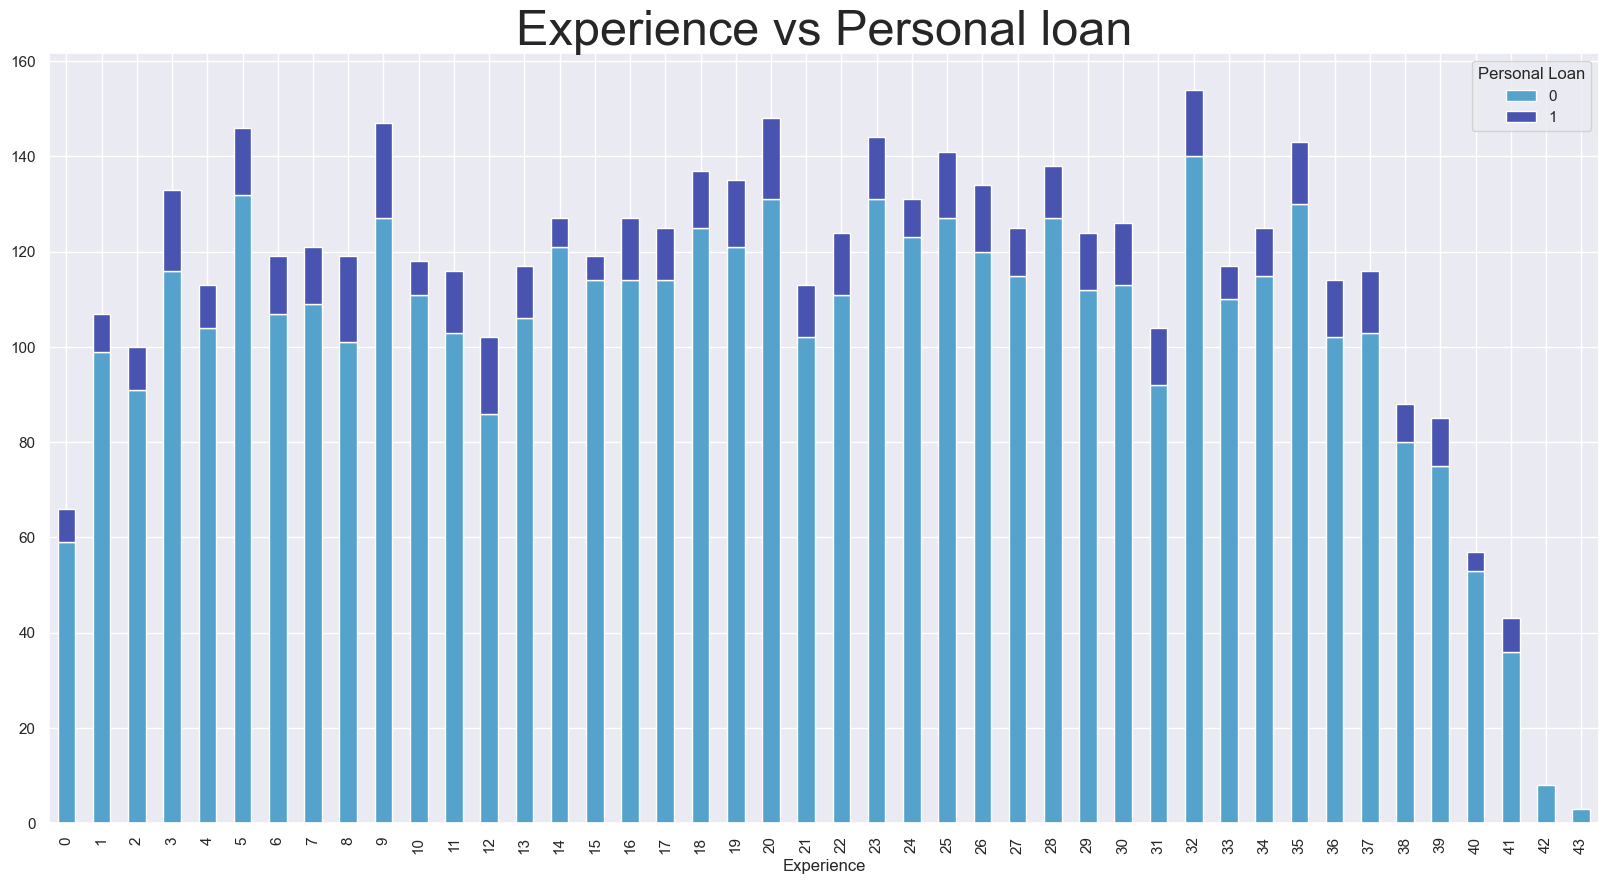

In [63]:
# Visualisation de l'influence de 'Experience' sur 'Personal Loan'.
df.groupby(['Experience', 'Personal Loan']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Experience vs Personal loan', fontsize=35)

plt.show()

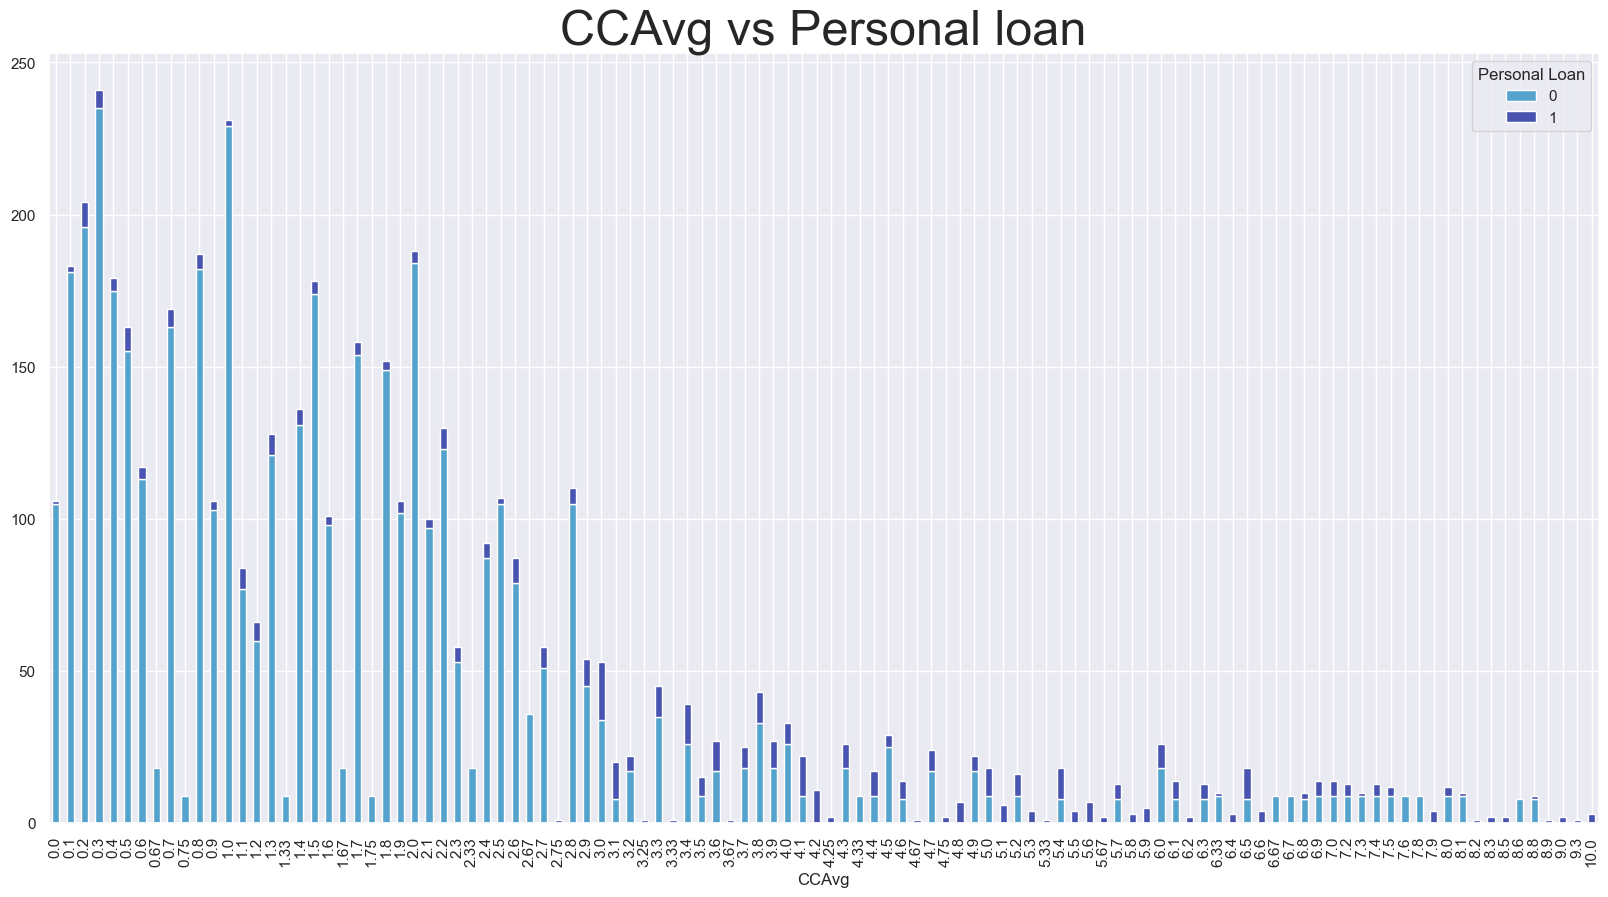

In [64]:
# Visualisation de l'influence de 'CCAvg' on 'Personal Loan'.
df.groupby(['CCAvg', 'Personal Loan']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('CCAvg vs Personal loan', fontsize=35)

plt.show()

#### Remarque : les clients ayant contracté un pret ont presque un grand CCAvg.

### REMARQUE GENERALE 
#####  - Les clients qui ont contracté un prêt ont le double de revenus que ceux qui n'ont pas obtenu de prêt.
#####  - Les emprunteurs ont un CCAvg plus grand.
#####  - Les emprunteurs ont un taux d'alphabétisation élevé.
#####  - Les emprunteurs ont le double de la valeur d'hypothèque que ceux qui n'ont pas obtenu de pret.

In [65]:
df

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4994   29           3      40     92697       1    1.9          3         0   
4995   30           4      15     92037       4    0.4          1        85   
4996   63          39      24     93023       2    0.3          3         0   
4997   65          40      49     90034       3    0.5          2         0   
4998   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4994              0                   0           0       1           0   
4995              0                   0           0       1           0   
4996              0                   0           0       0           0   
4997              0                   0           0       1           0   
4998              0                   0           0       1           1   

     Age_bin mort_bin  
0       0-30      NaN  
1      41-50      NaN  
2      31-40      NaN  
3      31-40      NaN  
4      31-40      NaN  
...      ...      ...  
4994    0-30      NaN  
4995    0-30    0-200  
4996   61-67      NaN  
4997   61-67      NaN  
4998    0-30      NaN  

[4999 rows x 15 columns]

#### Traitement des ZIP Code 
    - Nous allons faire correspondre les ZIP Code à leurs régions pour visualiser exactement
    - lesquelles des régions ont le plus d'emprunteurs.

In [66]:
df.rename(columns={"ZIP Code":"ZIPCode"},inplace=True)

In [67]:
df.ZIPCode.nunique()

466

In [68]:
# Liste des zipcodes uniques
list_zipcode=df.ZIPCode.unique()

In [69]:
# Nous créons un dictionnaire des régions utilsant la biblothèque zipcode et la méthode matching
dict_zip={}

for zipcode in list_zipcode:
    address = zcode.matching(zipcode.astype('str'))
    
    if len(address)==1: 
        county=address[0].get('county')
        
    else:
        county=zipcode
        
        
    dict_zip.update({zipcode:county })

In [70]:
# dict_zip

In [71]:
df['County']=df['ZIPCode'].map(dict_zip)
df

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0      25           1      49    91107       4    1.6          1         0   
1      45          19      34    90089       3    1.5          1         0   
2      39          15      11    94720       1    1.0          1         0   
3      35           9     100    94112       1    2.7          2         0   
4      35           8      45    91330       4    1.0          2         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
4994   29           3      40    92697       1    1.9          3         0   
4995   30           4      15    92037       4    0.4          1        85   
4996   63          39      24    93023       2    0.3          3         0   
4997   65          40      49    90034       3    0.5          2         0   
4998   28           4      83    92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0                 0                   1           0       0           0   
1                 0                   1           0       0           0   
2                 0                   0           0       0           0   
3                 0                   0           0       0           0   
4                 0                   0           0       0           1   
...             ...                 ...         ...     ...         ...   
4994              0                   0           0       1           0   
4995              0                   0           0       1           0   
4996              0                   0           0       0           0   
4997              0                   0           0       1           0   
4998              0                   0           0       1           1   

     Age_bin mort_bin                County  
0       0-30      NaN    Los Angeles County  
1      41-50      NaN    Los Angeles County  
2      31-40      NaN        Alameda County  
3      31-40      NaN  San Francisco County  
4      31-40      NaN    Los Angeles County  
...      ...      ...                   ...  
4994    0-30      NaN         Orange County  
4995    0-30    0-200      San Diego County  
4996   61-67      NaN        Ventura County  
4997   61-67      NaN    Los Angeles County  
4998    0-30      NaN         Orange County  

[4999 rows x 16 columns]

In [72]:
# Remarque : les zipcodes 96651,92634, 92717 n'ont pas de régions. Trouvons leurs correspondances sur internet
#Zip code 96651 est la région de Laguna Beach.
df.replace({'County': {96651:' Laguna Beach County'}} , inplace=True)
#Zip code 92634 la région de Fullerton.
df.replace({'County': {92634:'Fullerton County'}} , inplace=True)
#Zip code 92717 la région de Irvine.
df.replace({'County': {92717:'Irvine County'}} , inplace=True)

In [73]:
df.groupby(['County','Personal Loan'])['Personal Loan'].agg({'size'}).unstack()

size       
Personal Loan               0      1
County                              
 Laguna Beach County      6.0    NaN
Alameda County          456.0   44.0
Butte County             17.0    2.0
Contra Costa County      73.0   12.0
El Dorado County         16.0    1.0
Fresno County            24.0    2.0
Fullerton County          5.0    NaN
Humboldt County          30.0    2.0
Imperial County           3.0    NaN
Irvine County            19.0    3.0
Kern County              47.0    7.0
Lake County               4.0    NaN
Los Angeles County      984.0  111.0
Marin County             48.0    6.0
Mendocino County          7.0    1.0
Merced County             4.0    NaN
Monterey County         113.0   15.0
Napa County               3.0    NaN
Orange County           309.0   30.0
Placer County            22.0    2.0
Riverside County         50.0    6.0
Sacramento County       169.0   15.0
San Benito County        14.0    NaN
San Bernardino County    98.0    3.0
San Diego County        509.0   59.0
San Francisco County    238.0   19.0
San Joaquin County       12.0    1.0
San Luis Obispo County   28.0    5.0
San Mateo County        192.0   12.0
Santa Barbara County    143.0   11.0
Santa Clara County      492.0   71.0
Santa Cruz County        60.0    8.0
Shasta County            15.0    3.0
Siskiyou County           7.0    NaN
Solano County            30.0    3.0
Sonoma County            22.0    6.0
Stanislaus County        14.0    1.0
Trinity County            4.0    NaN
Tuolumne County           7.0    NaN
Ventura County          103.0   11.0
Yolo County             122.0    8.0

<Axes: ylabel='County'>

<Figure size 1500x2400 with 0 Axes>

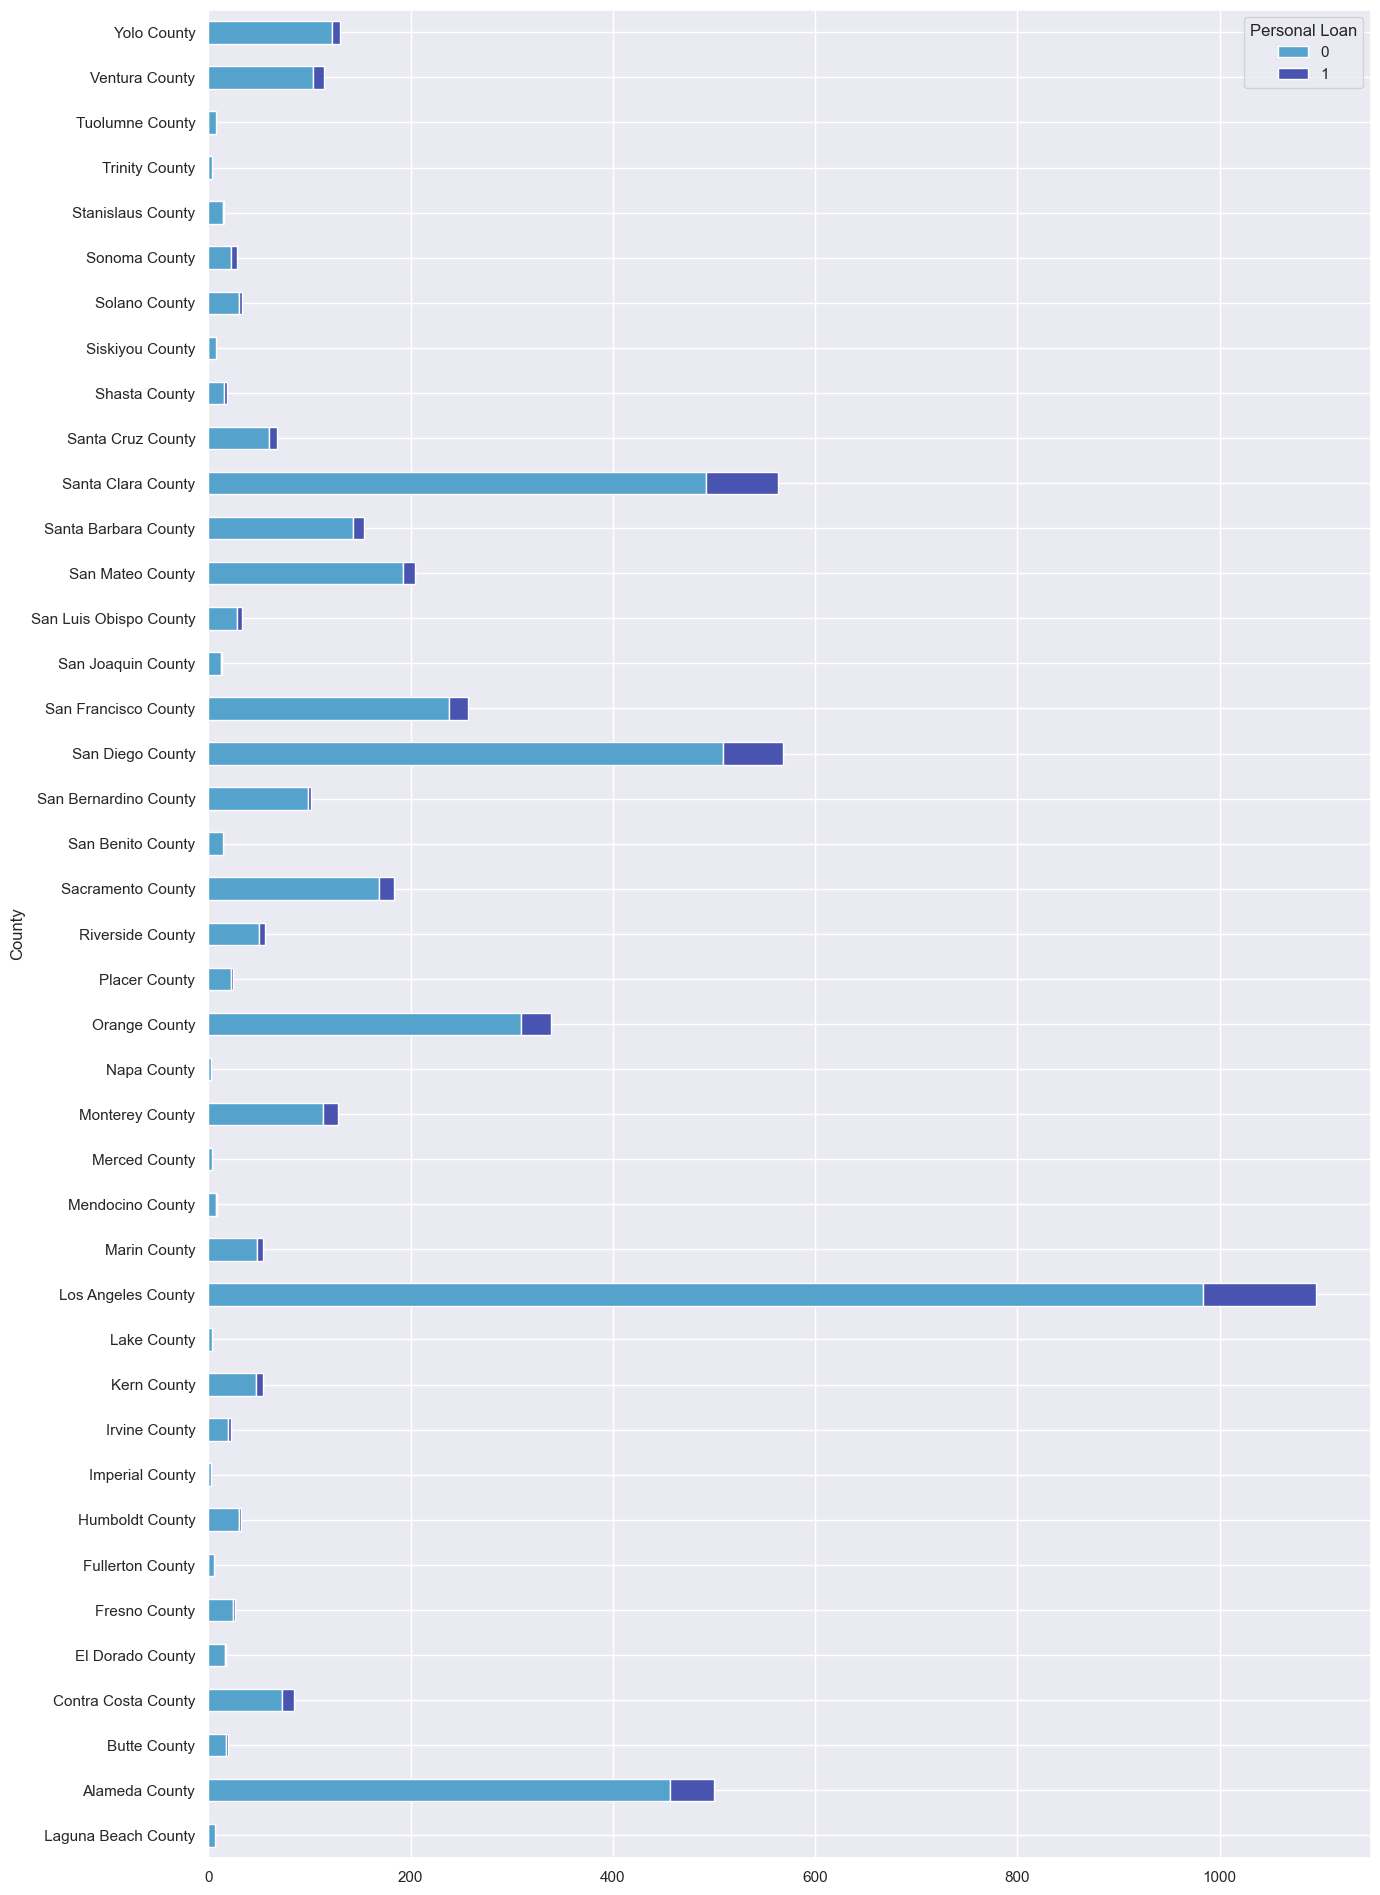

In [74]:
plt.figure(figsize=(15,24))

pd.crosstab(index=df['County'],columns=df['Personal Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

#### Remarque : 
    - le plus grand nombre des clients sont des régions de Los Angeles, San Diego et Santa Clara.
    - le plus grand nombre des clients ayant obtenu un crédit sont de ces memes régions.

#### SUPPRESSION DES COLONNES QUI N'INFLUENCENT PAS LA COLONNE CIBLE

In [75]:
df.drop('ZIPCode',axis=1,inplace=True)
df.drop('County',axis=1,inplace=True)
df.drop('Age_bin',axis=1,inplace=True)
df.drop('mort_bin',axis=1,inplace=True)

### 5. LA CORRELATION

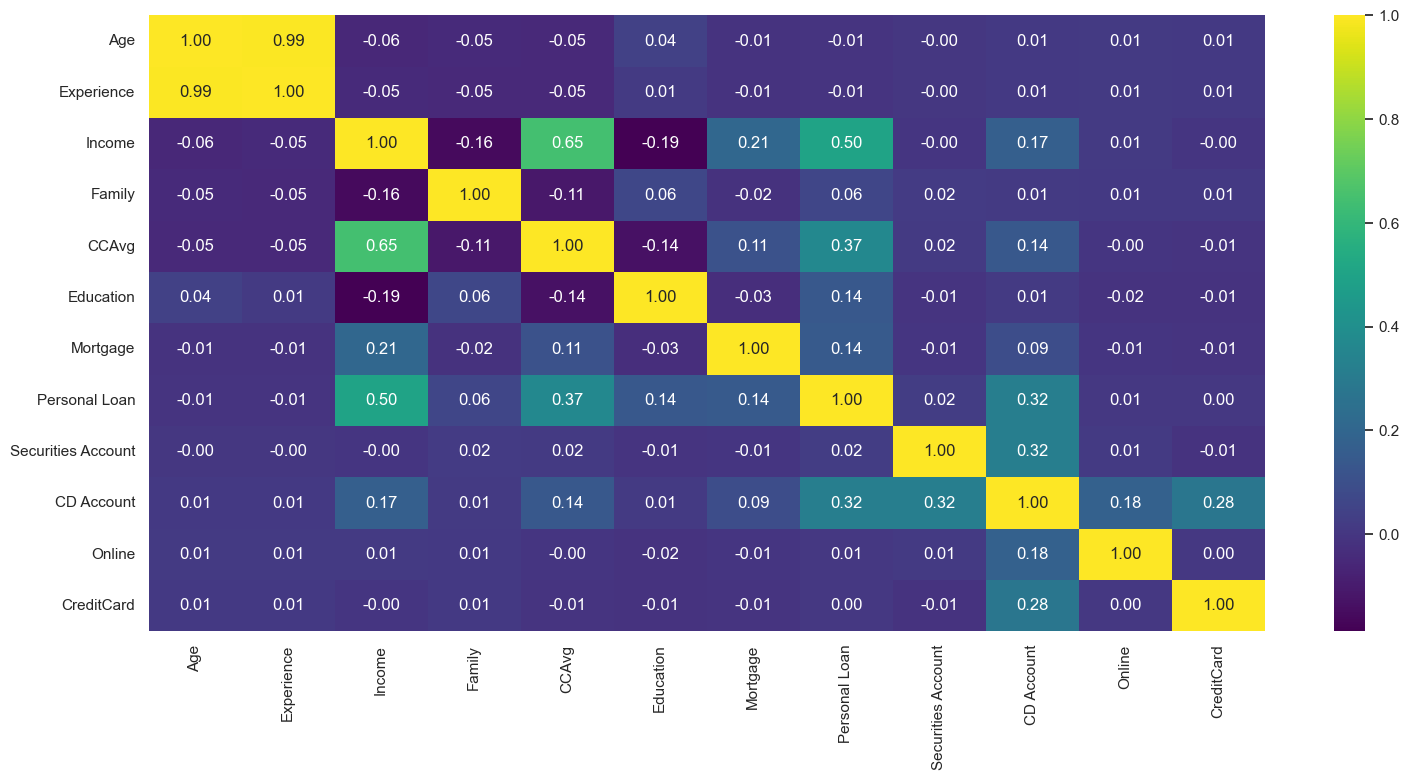

In [76]:
plt.figure(figsize = (18,8))
sns.heatmap(df.corr(), cmap= 'viridis',annot = True , fmt='.2f' )
plt.savefig("figures/correlation.png",dpi=200)

#### Remarque : 
    - Les colonnes'Age' et 'Experience' sont fortement corrélées.
    - Les colonnes 'Income' et 'CCAvg' sont modérément corrélées.
    - 'Personal Loan' est fortement corrélée avec 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
    - Il y a une association entre 'CD Account' avec Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
    - 'Mortgage' a une correlation modérée avec 'Income'.
    - 'Income' influence les variables 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage.

In [77]:
#pd.set_option('display.max_rows',20)

In [78]:
# Corrélation de la variable cible 'Personal Loan' et les autres variables.
df.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502459
CCAvg                 0.366864
CD Account            0.316344
Mortgage              0.142065
Education             0.136834
Family                0.061471
Securities Account    0.021932
Online                0.006332
CreditCard            0.002903
Age                  -0.007694
Experience           -0.008276
Name: Personal Loan, dtype: float64

In [79]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4999 non-null   int64  
 1   Experience          4999 non-null   int64  
 2   Income              4999 non-null   int64  
 3   Family              4999 non-null   int64  
 4   CCAvg               4999 non-null   float64
 5   Education           4999 non-null   int64  
 6   Mortgage            4999 non-null   int64  
 7   Personal Loan       4999 non-null   int64  
 8   Securities Account  4999 non-null   int64  
 9   CD Account          4999 non-null   int64  
 10  Online              4999 non-null   int64  
 11  CreditCard          4999 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.8 KB


In [81]:
df.describe()

Age   Experience       Income       Family        CCAvg  \
count  4999.000000  4999.000000  4999.000000  4999.000000  4999.000000   
mean     45.337267    20.133627    73.784757     2.396079     1.938206   
std      11.464033    11.416124    46.032281     1.147554     1.747731   
min      23.000000     0.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  4999.000000  4999.000000    4999.000000         4999.000000   
mean      1.880776    56.510102       0.096019            0.104421   
std       0.839804   101.720837       0.294647            0.305836   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

        CD Account       Online   CreditCard  
count  4999.000000  4999.000000  4999.000000  
mean      0.060412     0.596719     0.293859  
std       0.238273     0.490605     0.455574  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     1.000000     0.000000  
75%       0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

In [82]:
df['Personal Loan'].value_counts()

Personal Loan
0    4519
1     480
Name: count, dtype: int64

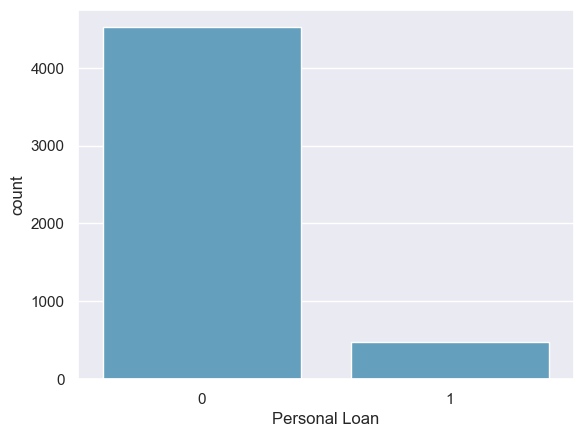

In [83]:
sns.countplot(data=df,x='Personal Loan');

### 6. CONSTRUCTION DU MODELE (Apprentissage Automatique)

In [84]:
# Séparer les features et le label
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']  #target(label)

### MODELE DE REGRESSION LOGISTIQUE

# Fractionnement du dataset en set d'entrainement et de test 80:20

In [85]:
# Répartition des datasets Train et Test en 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [86]:
print('X_train est de : ', X_train.shape)
print('X_test est de : ', X_test.shape)
print('y_train est de : ', y_train.shape)
print('y_test est de : ', y_test.shape)

X_train est de :  (3999, 11)
X_test est de :  (1000, 11)
y_train est de :  (3999,)
y_test est de :  (1000,)


### NORMALISATION 

#### Mise à l'échelle des données (Feature Scaling)

In [87]:
scaler = StandardScaler()

In [88]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### Choix des hyperparamètres du Logistic Regression par GridSearch

In [89]:
# Choix du meilleur paramètre 'C'
C_param_range = [0.001,0.01,0.1,1,10,100,1000]

# Choix du Type de pénalité
penalty = ['l1', 'l2']

# Choix du meilleur paramètre 'solver'
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# Choix du meilleur paramètre 'class weight'
class_wright_list = [None,'balanced']

params = dict(C=C_param_range, penalty=penalty, solver=solver_list, class_weight=class_wright_list)
log_model = LogisticRegression(random_state=101)
grid_model = GridSearchCV(log_model, params, cv=5)
grid_model.fit(scaled_X_train, y_train)
grid_model.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}

#### Création du modèle Final

In [90]:
log_model_final=LogisticRegression(C=10,class_weight=None,penalty='l2',solver='lbfgs',random_state=101)

In [91]:
log_model_final.fit(scaled_X_train,y_train)

LogisticRegression(C=10, random_state=101)

In [92]:
log_model_final.get_params()

{'C': 10,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 101,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [93]:
# Les coefficients des features
log_model_final.coef_

array([[ 0.03553946,  0.092218  ,  2.42276615,  0.71071074,  0.25794117,
         1.45295805,  0.07891893, -0.35838225,  0.96230199, -0.30398178,
        -0.46695093]])

In [94]:
coefficients = pd.Series(index=X.columns,data=log_model_final.coef_[0])

In [95]:
coefficients = coefficients.sort_values()

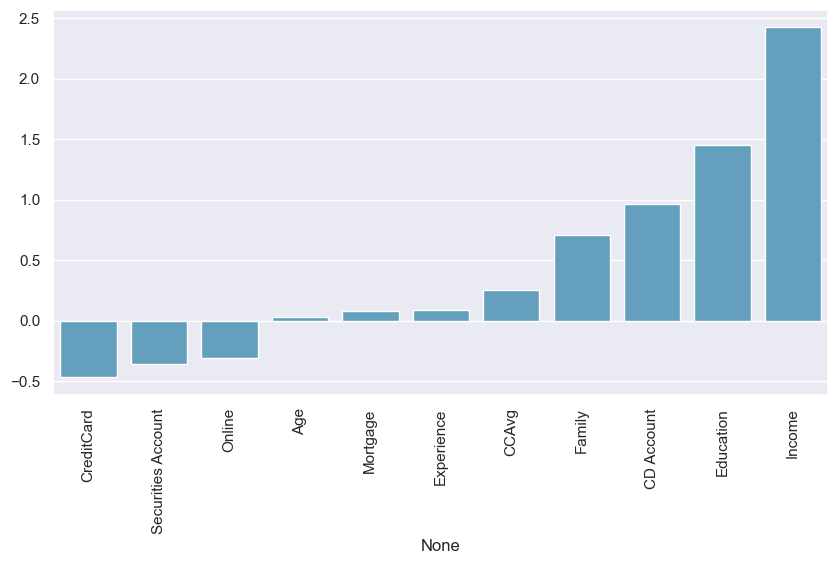

In [96]:
plt.figure(figsize=(10,5))
sns.barplot(x=coefficients.index,y=coefficients.values);
plt.xticks(rotation=90);
plt.savefig("figures/coefficients.png",dpi=200)

#### EVALUATION DES PERFORMANCES DU MODELE

In [97]:
y_pred = log_model_final.predict(scaled_X_test)

In [98]:
y_pred_proba = log_model_final.predict_proba(scaled_X_test)

In [99]:
y_pred_proba[:10]

array([[7.07421643e-01, 2.92578357e-01],
       [9.85396452e-01, 1.46035478e-02],
       [9.99664092e-01, 3.35907958e-04],
       [8.56152813e-01, 1.43847187e-01],
       [9.96378400e-01, 3.62159966e-03],
       [9.61449799e-01, 3.85502006e-02],
       [9.99739844e-01, 2.60156291e-04],
       [9.98748652e-01, 1.25134767e-03],
       [9.98600021e-01, 1.39997897e-03],
       [8.59677321e-01, 1.40322679e-01]])

In [100]:
confusion_matrix(y_test,y_pred)

array([[893,  13],
       [ 25,  69]], dtype=int64)

In [101]:
model_confusion_matrix=confusion_matrix(y_test,y_pred)
print (model_confusion_matrix)    

print ('\nTrue Positive =' , model_confusion_matrix [1][1])
print (  'True Negative =' , model_confusion_matrix [0][0])
print (  'False Positive =' , model_confusion_matrix [0][1])
print (  'False Negative =' , model_confusion_matrix [1][0])

[[893  13]
 [ 25  69]]

True Positive = 69
True Negative = 893
False Positive = 13
False Negative = 25


<Figure size 1000x500 with 0 Axes>

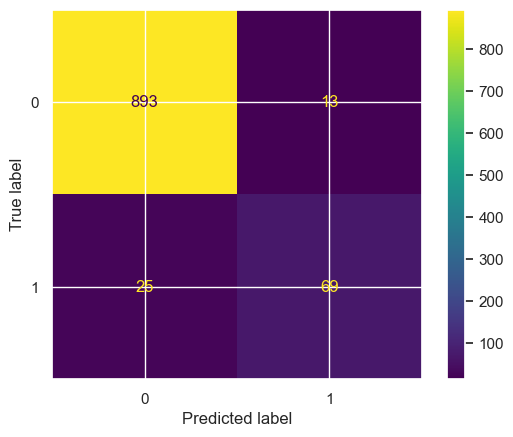

In [102]:
plt.figure(figsize=(10,5))
ConfusionMatrixDisplay.from_estimator(log_model_final,scaled_X_test,y_test);
plt.savefig("figures/matrice_confusion.png",dpi=200)

In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       906
           1       0.84      0.73      0.78        94

    accuracy                           0.96      1000
   macro avg       0.91      0.86      0.88      1000
weighted avg       0.96      0.96      0.96      1000



<Figure size 1000x500 with 0 Axes>

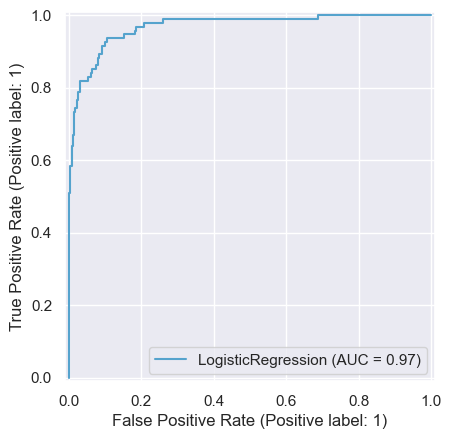

In [104]:
plt.figure(figsize=(10,5))
RocCurveDisplay.from_estimator(log_model_final,scaled_X_test,y_test);
plt.savefig("figures/roc.png",dpi=200)

### APPLICATION DES MODELES SUIVANTS : LOGISTICREGRESSION, KNNCLASSIFIER, DECISIONTREECLASSIFIER

----------- LogisticRegression ----------:
Accuracy du modèle est : 0.962
Precision du modèle est : 0.8414634146341463
Recall du modèle est : 0.7340425531914894
F1-score du modèle est : 0.7840909090909091
[[893  13]
 [ 25  69]]
--------- Rapport de Classification du modèle ------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       906
           1       0.84      0.73      0.78        94

    accuracy                           0.96      1000
   macro avg       0.91      0.86      0.88      1000
weighted avg       0.96      0.96      0.96      1000

------------------------------------------------------------
----------- KNeighborsClassifier ----------:
Accuracy du modèle est : 0.962
Precision du modèle est : 0.9
Recall du modèle est : 0.6702127659574468
F1-score du modèle est : 0.7682926829268293
[[899   7]
 [ 31  63]]
--------- Rapport de Classification du modèle ------------
              precision    recall  f1-score   suppo

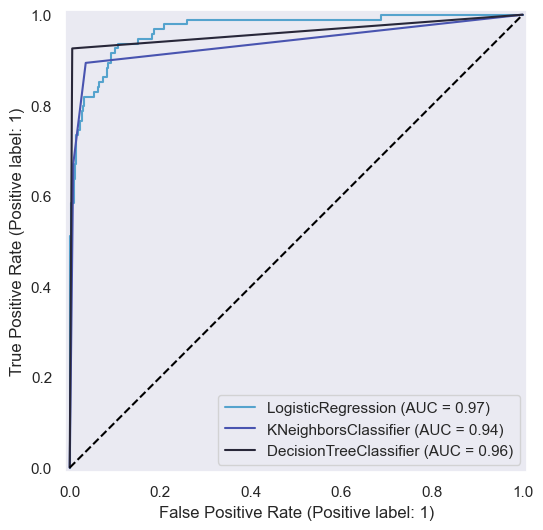

In [127]:
# Application des trois algorithmes Logistic Regression, KNN et Decision Trees
models = {
    'LogisticRegression':LogisticRegression(C=10,class_weight=None,penalty='l2',solver='lbfgs',random_state=101),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=2),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=101)
}

# La fonction de l'accuracy
def accuracy_function(y_true,y_pred,retu=False):
    acc= metrics.accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'Accuracy du modèle est : {acc}')

# La fonction de la précision
def precision_function(y_true,y_pred,retu=False):
    precision = metrics.precision_score(y_test, y_pred)
    if retu:
        return precision
    else:
        print(f'Precision du modèle est : {precision}')

# La fonction du rappel
def recall_function(y_true,y_pred,retu=False):
    recall = metrics.recall_score(y_test, y_pred)
    if retu:
        return recall
    else:
        print(f'Recall du modèle est : {recall}')

# La fonction du f1-score
def f1_function(y_true,y_pred,retu=False):
    f1 = metrics.f1_score(y_test, y_pred)
    if retu:
        return f1
    else:
        print(f'F1-score du modèle est : {f1}')

# Tracer les courbes ROC
plt.figure(figsize=(10, 6))

# La fonction d'application des modèles
def train_test_evaluation(models,X_train,X_test,y_train,y_test):
    for name,model in models.items():
        print('-----------',name,'----------:')
        model.fit(X_train,y_train)
        accuracy_function(y_test,model.predict(X_test))
        precision_function(y_test,model.predict(X_test))
        recall_function(y_test,model.predict(X_test))
        f1_function(y_test,model.predict(X_test))
        print(confusion_matrix(y_test,model.predict(X_test)))
        print('--------- Rapport de Classification du modèle ------------')
        print(classification_report(y_test,model.predict(X_test)))

        # Afficher la courbe ROC
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
        print('-'*60)


train_test_evaluation(models,scaled_X_train,scaled_X_test,y_train,y_test)

# Tracer la diagonale (chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Configurer le graphique
plt.grid()
plt.show()

### COMPARAISON DE TOUS LES MODELES

In [106]:
All_models= {'Models':['Logistic Regression' , 'K-Nearest Neighbour', 'Decision Tree'],
             'Accuracy': [0.962,0.962,0.988 ],
             'Recall': [0.734,0.67,0.925 ],
             'Precision': [0.84,0.9,0.94 ],
             'F1_score' : [0.784 ,0.77, 0.93], 
             'True Positive' : [69,63,87],
             'True Negative' :[893,899,901], 
             'False Positive':[13,7,5],
             'False Negative ':[25,31,7]}
             
comparison = pd.DataFrame(All_models)
comparison

Models  Accuracy  Recall  Precision  F1_score  True Positive  \
0  Logistic Regression     0.962   0.734       0.84     0.784             69   
1  K-Nearest Neighbour     0.962   0.670       0.90     0.770             63   
2        Decision Tree     0.988   0.925       0.94     0.930             87   

   True Negative  False Positive  False Negative   
0            893              13               25  
1            899               7               31  
2            901               5                7

# CONTAMINATION DES DONNEES D'ENTRAINEMENT

#### Fonction de contamination des données de y_train

In [107]:
# Fonction de contamination
def contaminate_data(y_train, contamination_rate=0.1):
    # Convertir y_train en tableau NumPy
    y_train = np.array(y_train)
    
    # Calcul du nombre de points à contaminer
    num_to_contaminate = int(len(y_train) * contamination_rate)
    
    # Choix aléatoirement des indices à contaminer
    indices_to_contaminate = np.random.choice(len(y_train), size=num_to_contaminate, replace=False)
    
    # Inversion des valeurs à ces indices
    y_train[indices_to_contaminate] = 1 - y_train[indices_to_contaminate]
    
    return y_train

contaminated_y_train = contaminate_data(y_train)

#### Vérification de la contamination des données

In [108]:
# Fonction de test de contamination 
def test_contamination(original_y, contaminated_y, contamination_rate=0.1):
    # Vérification de la longueur des deux tableaux 
    if len(original_y) != len(contaminated_y):
        raise ValueError("Les tableaux doivent avoir la même longueur.")
    
    # Calcul du nombre de valeurs qui devraient avoir été contaminées
    num_to_contaminate = int(len(original_y) * contamination_rate)
    
    # Identification des indices où les valeurs ont été changées
    changed_indices = np.where(original_y != contaminated_y)[0]
    
    # Vérification du nombre de changements
    if len(changed_indices) == num_to_contaminate:
        print(f"Test réussi : {len(changed_indices)} valeurs ont été contaminées.")
    else:
        print(f"Test échoué : {len(changed_indices)} valeurs ont été contaminées, attendu {num_to_contaminate}.")


In [109]:
# Test de contamination
test_contamination(y_train, contaminated_y_train)

Test réussi : 399 valeurs ont été contaminées.


----------- LogisticRegression ----------:
Accuracy du modèle est : 0.95
Precision du modèle est : 0.8333333333333334
Recall du modèle est : 0.5851063829787234
F1-score du modèle est : 0.6875
[[895  11]
 [ 39  55]]
--------- Rapport de Classification du modèle ------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       906
           1       0.83      0.59      0.69        94

    accuracy                           0.95      1000
   macro avg       0.90      0.79      0.83      1000
weighted avg       0.95      0.95      0.95      1000

------------------------------------------------------------
----------- KNeighborsClassifier ----------:
Accuracy du modèle est : 0.939
Precision du modèle est : 0.7538461538461538
Recall du modèle est : 0.5212765957446809
F1-score du modèle est : 0.6163522012578616
[[890  16]
 [ 45  49]]
--------- Rapport de Classification du modèle ------------
              precision    recall  f1-score   sup

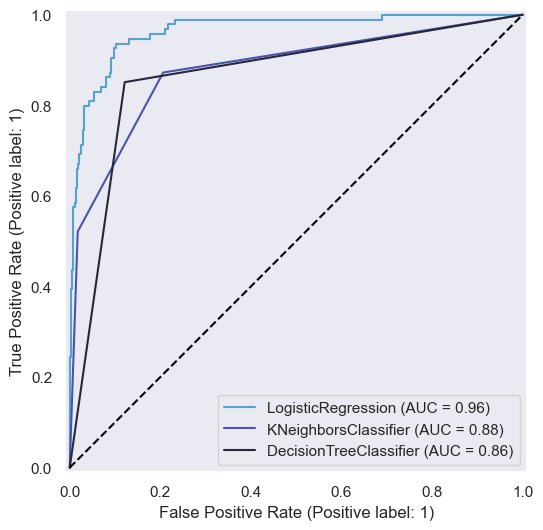

In [110]:
# Application des trois algorithmes Logistic Regression, KNN et Decision Trees
models = {
    'LogisticRegression':LogisticRegression(C=10,class_weight=None,penalty='l2',solver='lbfgs',random_state=101),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=2),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=101)
}

# La fonction de l'accuracy
def accuracy_function(y_true,y_pred,retu=False):
    acc= metrics.accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'Accuracy du modèle est : {acc}')

# La fonction de la précision
def precision_function(y_true,y_pred,retu=False):
    precision = metrics.precision_score(y_test, y_pred)
    if retu:
        return precision
    else:
        print(f'Precision du modèle est : {precision}')

# La fonction du rappel
def recall_function(y_true,y_pred,retu=False):
    recall = metrics.recall_score(y_test, y_pred)
    if retu:
        return recall
    else:
        print(f'Recall du modèle est : {recall}')

# La fonction du f1-score
def f1_function(y_true,y_pred,retu=False):
    f1 = metrics.f1_score(y_test, y_pred)
    if retu:
        return f1
    else:
        print(f'F1-score du modèle est : {f1}')

# Tracer les courbes ROC
plt.figure(figsize=(10, 6))

# La fonction d'application des modèles
def train_test_evaluation(models,X_train,X_test,y_train,y_test):
    for name,model in models.items():
        print('-----------',name,'----------:')
        model.fit(X_train,y_train)
        accuracy_function(y_test,model.predict(X_test))
        precision_function(y_test,model.predict(X_test))
        recall_function(y_test,model.predict(X_test))
        f1_function(y_test,model.predict(X_test))
        print(confusion_matrix(y_test,model.predict(X_test)))
        print('--------- Rapport de Classification du modèle ------------')
        print(classification_report(y_test,model.predict(X_test)))

        # Afficher la courbe ROC
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
        print('-'*60)


train_test_evaluation(models,scaled_X_train,scaled_X_test,contaminated_y_train,y_test)

# Tracer la diagonale (chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Configurer le graphique
plt.grid()
plt.show()

# Fractionnement du dataset en set d'entrainement et de test 60:40

In [131]:
# Séparer les features et le label
df1 = df
X1 = df1.drop(['Personal Loan'], axis=1)
y1 = df1['Personal Loan']  #target(label)

In [132]:
# Répartition des datasets Train et Test en 60:40
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.40, random_state=101)

In [133]:
print('X_train est de : ', X_train1.shape)
print('X_test est de : ', X_test1.shape)
print('y_train est de : ', y_train1.shape)
print('y_test est de : ', y_test1.shape)

X_train est de :  (2999, 11)
X_test est de :  (2000, 11)
y_train est de :  (2999,)
y_test est de :  (2000,)


### NORMALISATION 

#### Mise à l'échelle des données (Feature Scaling)

In [134]:
scaler1 = StandardScaler()

In [135]:
scaled_X_train1 = scaler1.fit_transform(X_train1)
scaled_X_test1 = scaler1.transform(X_test1)

#### Choix des hyperparamètres du Logistic Regression par GridSearch

In [136]:
# Choix du meilleur paramètre 'C'
C_param_range = [0.001,0.01,0.1,1,10,100,1000]

# Choix du Type de pénalité
penalty = ['l1', 'l2']

# Choix du meilleur paramètre 'solver'
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

# Choix du meilleur paramètre 'class weight'
class_wright_list = [None,'balanced']

params = dict(C=C_param_range, penalty=penalty, solver=solver_list, class_weight=class_wright_list)
log_model = LogisticRegression(random_state=101)
grid_model = GridSearchCV(log_model, params, cv=5)
grid_model.fit(scaled_X_train1, y_train1)
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}

### APPLICATION DES MODELES SUIVANTS : LOGISTICREGRESSION, KNNCLASSIFIER, DECISIONTREECLASSIFIER

----------- LogisticRegression ----------:
Accuracy du modèle est : 0.953
Precision du modèle est : 0.8321678321678322
Recall du modèle est : 0.6296296296296297
F1-score du modèle est : 0.7168674698795181
[[1787   24]
 [  70  119]]
--------- Rapport de Classification du modèle ------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1811
           1       0.83      0.63      0.72       189

    accuracy                           0.95      2000
   macro avg       0.90      0.81      0.85      2000
weighted avg       0.95      0.95      0.95      2000

------------------------------------------------------------
----------- KNeighborsClassifier ----------:
Accuracy du modèle est : 0.9585
Precision du modèle est : 0.9491525423728814
Recall du modèle est : 0.5925925925925926
F1-score du modèle est : 0.7296416938110749
[[1805    6]
 [  77  112]]
--------- Rapport de Classification du modèle ------------
              precision    

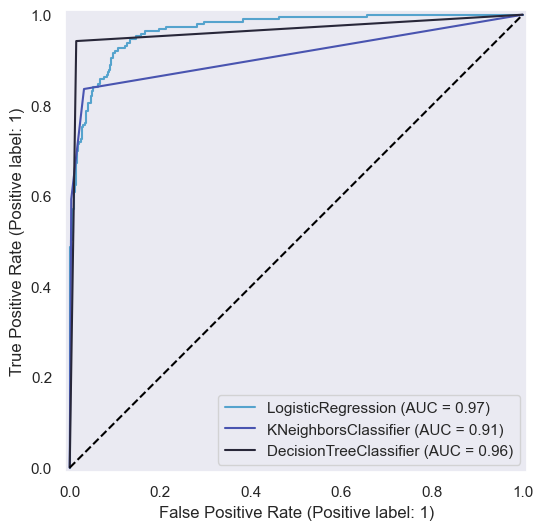

In [137]:
# Application des trois algorithmes Logistic Regression, KNN et Decision Trees
models = {
    'LogisticRegression':LogisticRegression(C=0.1,class_weight=None,penalty='l2',solver='liblinear',random_state=101),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=2),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=101)
}

# La fonction de l'accuracy
def accuracy_function(y_true,y_pred,retu=False):
    acc= metrics.accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'Accuracy du modèle est : {acc}')

# La fonction de la précision
def precision_function(y_true,y_pred,retu=False):
    precision = metrics.precision_score(y_true, y_pred)
    if retu:
        return precision
    else:
        print(f'Precision du modèle est : {precision}')

# La fonction du rappel
def recall_function(y_true,y_pred,retu=False):
    recall = metrics.recall_score(y_true, y_pred)
    if retu:
        return recall
    else:
        print(f'Recall du modèle est : {recall}')

# La fonction du f1-score
def f1_function(y_true,y_pred,retu=False):
    f1 = metrics.f1_score(y_true, y_pred)
    if retu:
        return f1
    else:
        print(f'F1-score du modèle est : {f1}')

# Tracer les courbes ROC
plt.figure(figsize=(10, 6))

# La fonction d'application des modèles
def train_test_evaluation(models,X_train,X_test,y_train,y_test):
    for name,model in models.items():
        print('-----------',name,'----------:')
        model.fit(X_train,y_train)
        accuracy_function(y_test,model.predict(X_test))
        precision_function(y_test,model.predict(X_test))
        recall_function(y_test,model.predict(X_test))
        f1_function(y_test,model.predict(X_test))
        print(confusion_matrix(y_test,model.predict(X_test)))
        print('--------- Rapport de Classification du modèle ------------')
        print(classification_report(y_test,model.predict(X_test)))

        # Afficher la courbe ROC
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
        print('-'*60)


train_test_evaluation(models,scaled_X_train1,scaled_X_test1,y_train1,y_test1)

# Tracer la diagonale (chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Configurer le graphique
plt.savefig("figures/roc_general.png",dpi=200)
plt.grid()
plt.show()

# CONTAMINATION DES DONNEES D'ENTRAINEMENT

In [138]:
contaminated_y_train1 = contaminate_data(y_train1)

In [139]:
# Test de contamination
test_contamination(y_train1, contaminated_y_train1)

Test réussi : 299 valeurs ont été contaminées.


----------- LogisticRegression ----------:
Accuracy du modèle est : 0.9495
Precision du modèle est : 0.8666666666666667
Recall du modèle est : 0.5502645502645502
F1-score du modèle est : 0.6731391585760518
[[1795   16]
 [  85  104]]
--------- Rapport de Classification du modèle ------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1811
           1       0.87      0.55      0.67       189

    accuracy                           0.95      2000
   macro avg       0.91      0.77      0.82      2000
weighted avg       0.95      0.95      0.94      2000

------------------------------------------------------------
----------- KNeighborsClassifier ----------:
Accuracy du modèle est : 0.9415
Precision du modèle est : 0.8272727272727273
Recall du modèle est : 0.48148148148148145
F1-score du modèle est : 0.6086956521739131
[[1792   19]
 [  98   91]]
--------- Rapport de Classification du modèle ------------
              precision  

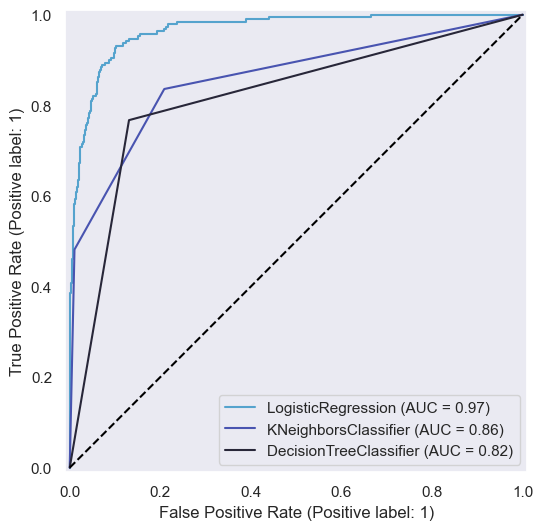

In [140]:
# Application des trois algorithmes Logistic Regression, KNN et Decision Trees
models = {
    'LogisticRegression':LogisticRegression(C=0.1,class_weight=None,penalty='l2',solver='liblinear',random_state=101),
    'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=2),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=101)
}

# La fonction de l'accuracy
def accuracy_function(y_true,y_pred,retu=False):
    acc= metrics.accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'Accuracy du modèle est : {acc}')

# La fonction de la précision
def precision_function(y_true,y_pred,retu=False):
    precision = metrics.precision_score(y_true, y_pred)
    if retu:
        return precision
    else:
        print(f'Precision du modèle est : {precision}')

# La fonction du rappel
def recall_function(y_true,y_pred,retu=False):
    recall = metrics.recall_score(y_true, y_pred)
    if retu:
        return recall
    else:
        print(f'Recall du modèle est : {recall}')

# La fonction du f1-score
def f1_function(y_true,y_pred,retu=False):
    f1 = metrics.f1_score(y_true, y_pred)
    if retu:
        return f1
    else:
        print(f'F1-score du modèle est : {f1}')

# Tracer les courbes ROC
plt.figure(figsize=(10, 6))

# La fonction d'application des modèles
def train_test_evaluation(models,X_train,X_test,y_train,y_test):
    for name,model in models.items():
        print('-----------',name,'----------:')
        model.fit(X_train,y_train)
        accuracy_function(y_test,model.predict(X_test))
        precision_function(y_test,model.predict(X_test))
        recall_function(y_test,model.predict(X_test))
        f1_function(y_test,model.predict(X_test))
        print(confusion_matrix(y_test,model.predict(X_test)))
        print('--------- Rapport de Classification du modèle ------------')
        print(classification_report(y_test,model.predict(X_test)))

        # Afficher la courbe ROC
        RocCurveDisplay.from_estimator(model, X_test, y_test, name=name, ax=plt.gca())
        print('-'*60)


train_test_evaluation(models,scaled_X_train1,scaled_X_test1,contaminated_y_train1,y_test1)

# Tracer la diagonale (chance)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Configurer le graphique
plt.grid()
plt.savefig("figures/roc_contamination.png",dpi=200)
plt.show()

### Sauvegarde du Modèle et du Convertisseur

In [121]:
dump(log_model_final, 'models/credit_model.joblib') 

['models/credit_model.joblib']

In [122]:
dump(scaler,'models/scaler.joblib')

['models/scaler.joblib']

### Déploiement

In [123]:
loaded_scaler = load('models/scaler.joblib')
loaded_model = load('models/credit_model.joblib')

In [125]:
client = [[ 42 ,   16 ,   200 , 3 , 1.2 ,   3 ,   0 ,   1,
          0,   1,   1]]

In [126]:
X_cols = X.columns

In [127]:
client = pd.DataFrame(data=client,columns=X_cols)
client

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   42          16     200       3    1.2          3         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       1           1

In [130]:
client_scaled = loaded_scaler.transform(client)

In [131]:
predict = loaded_model.predict(client_scaled)

In [132]:
if(predict[0] == 0):
    print('Le client est défaillant.')
else: 
    print('Le client est non défaillant.')

Le client est non défaillant.
